# Critical Point Detection

## Load sentence

In [16]:
import timit_stats as ts
import gesture as ges
import os
import matplotlib.pyplot as plt

%pylab inline

root_dir = "../USC-TIMIT/EMA/Data/M1"
index = 0

t_names, m_names = zip(*ts.list_TIMIT_dir(root_dir))
trans_fname = t_names[index]
mat_fname = m_names[index]

# parse .trans file
t_starts, t_ends, phonemes, words, sentences = ts.parse_transcription(trans_fname)
phones = list(set(phonemes))
# parse .mat file
params, srates = ts.parse_mat(mat_fname)
print "Sentence \"{}\" loaded succesfully".format(trans_fname)

Populating the interactive namespace from numpy and matplotlib
Sentence "../USC-TIMIT/EMA/Data/M1\trans\usctimit_ema_m1_001_005.trans" loaded succesfully


`%matplotlib` prevents importing * from pylab and numpy


## Show sentence and phonemes

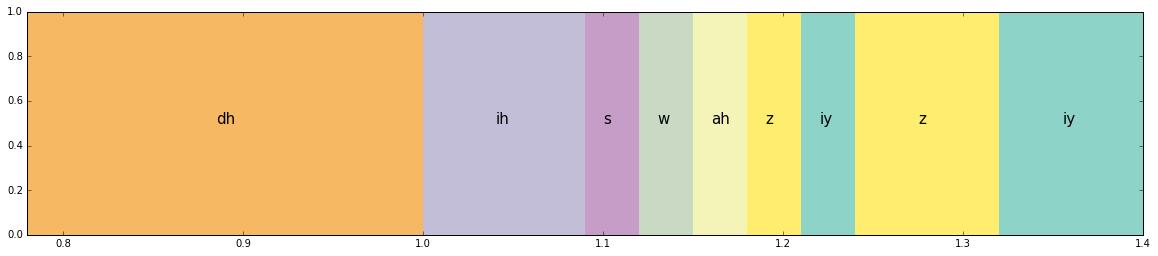

In [17]:
import matplotlib.patches as patches

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(phones))]
colors = dict(zip(phones, colors))

# show first 20 phonemes except first one ("silence")
show_start = 1
num_to_show = 9
show_last = min(len(phonemes), show_start + num_to_show)


fig1, ax1 = plt.subplots(figsize=(20, 4))
ax1.set_xlim(t_starts[show_start], t_ends[show_last-1])
ax1.set_ylim(0, 1.0)
for i in range(show_start, show_last):
    width = t_ends[i]-t_starts[i]
    height = 1.0
    ax1.add_patch(patches.Rectangle((t_starts[i], 0.0),
                                    width, height, color=colors[phonemes[i]]))  
    ax1.text(t_starts[i]+width/2-0.005, height/2, phonemes[i], fontsize=15)
plt.show()

## Calculate Importance Function

In [18]:
import critical_point as cp

artic = "LL"
domains = ["_x", "_y"]
importance, vel, angle = cp.calc_importance(params[artic+domains[0]], params[artic+domains[1]])

## Plot Importance and Articulator

(12.5, 17.0, -24.0, -12.0)

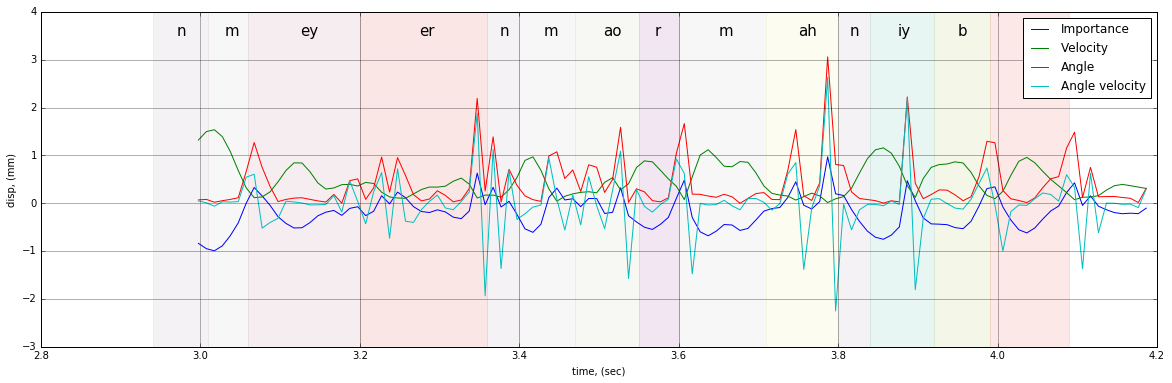

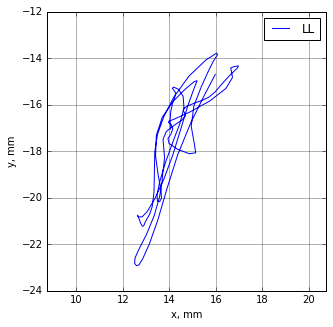

In [20]:
import bisect

fig, ax = plt.subplots(figsize=(20, 6))

i_start = 300
i_end = 420
t = range(i_start,i_end)
t = [i / srates[artic+domains[0]] for i in t]
imp = importance[i_start:i_end]
ax.plot(t, importance[i_start:i_end], label='Importance')
ax.plot(t, vel[i_start:i_end], label='Velocity')
ax.plot(t, angle[i_start:i_end], label='Angle')
ax.plot(t, [angle[i]-angle[i-1] for i in range(i_start,i_end)], label='Angle velocity')


ph_start = bisect.bisect(t_starts, t[0]) -1
ph_end = bisect.bisect(t_ends, t[-1])
for i in range(ph_start, ph_end):
    width = t_ends[i]-t_starts[i]
    height = ax.get_ylim()[1]-ax.get_ylim()[0]
    ax.add_patch(patches.Rectangle((t_starts[i], ax.get_ylim()[0]),
                                    width, height, color=colors[phonemes[i]], alpha = 0.2))  
    ax.text(t_starts[i]+width/2-0.005, height/2, phonemes[i], fontsize=15)

# ax.plot(t, params[artic+domains[0]][i_start:i_end], label=artic+domains[0])
# ax.plot(t, params[artic+domains[1]][i_start:i_end], label=artic+domains[1])

ax.legend()
ax.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
ax.set_xlabel("time, (sec)")
ax.set_ylabel("disp, (mm)")
ax.autoscale()


fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.plot( params[artic+domains[0]][i_start:i_end], params[artic+domains[1]][i_start:i_end], label=artic)
ax1.legend()
ax1.autoscale()
ax1.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
ax1.set_xlabel('x, mm')
ax1.set_ylabel('y, mm')
ax1.axis('equal')

## Split into phonemes

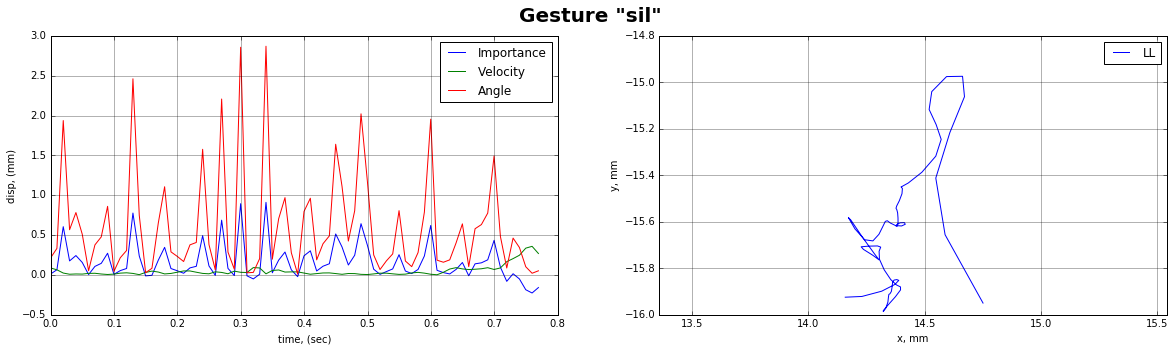

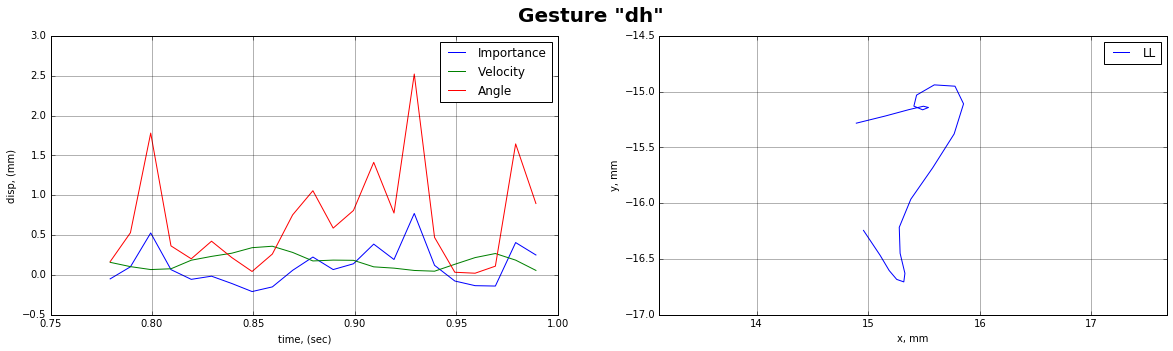

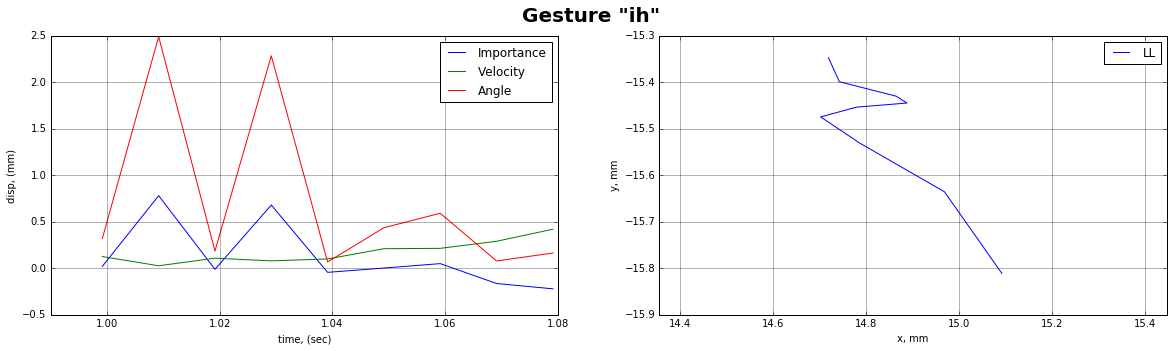

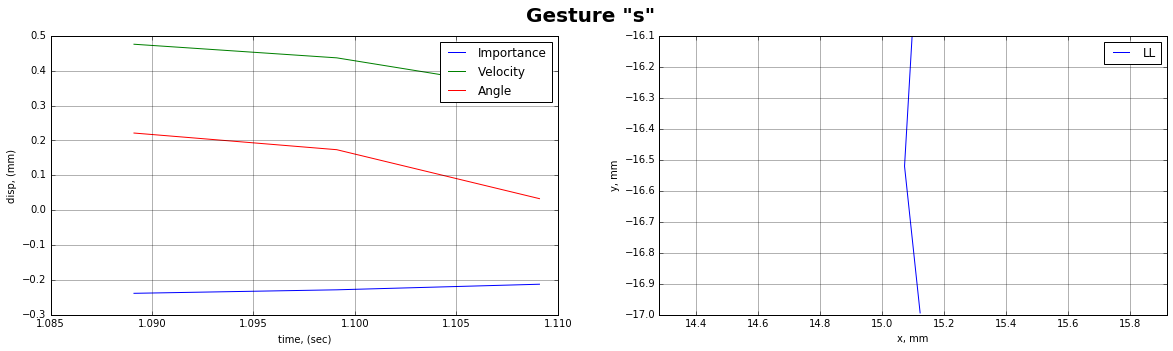

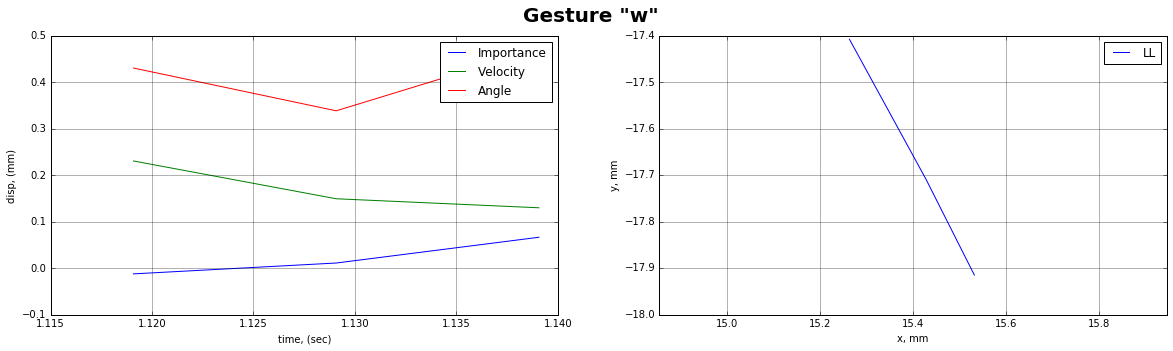

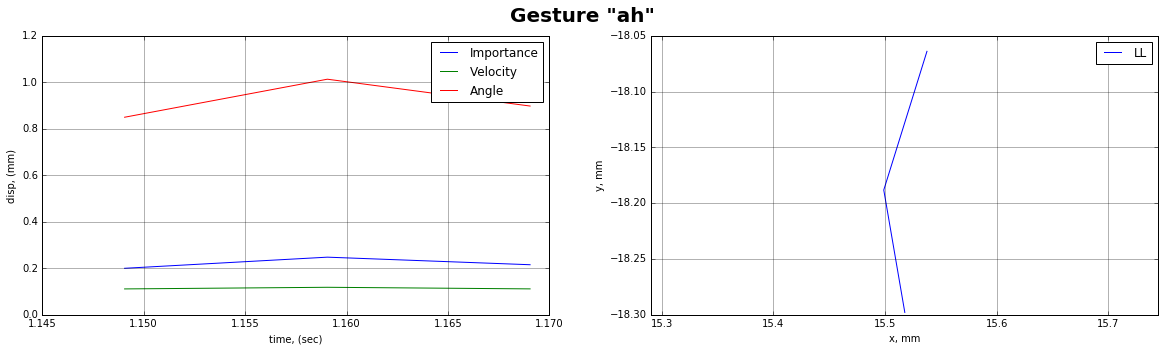

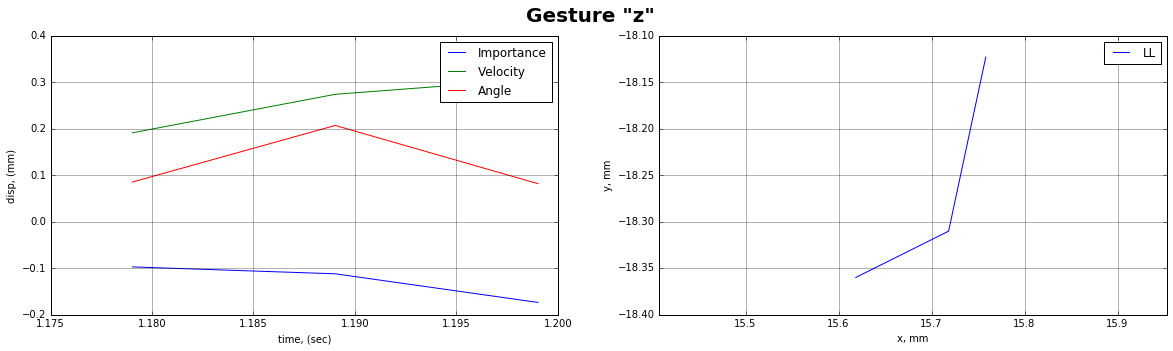

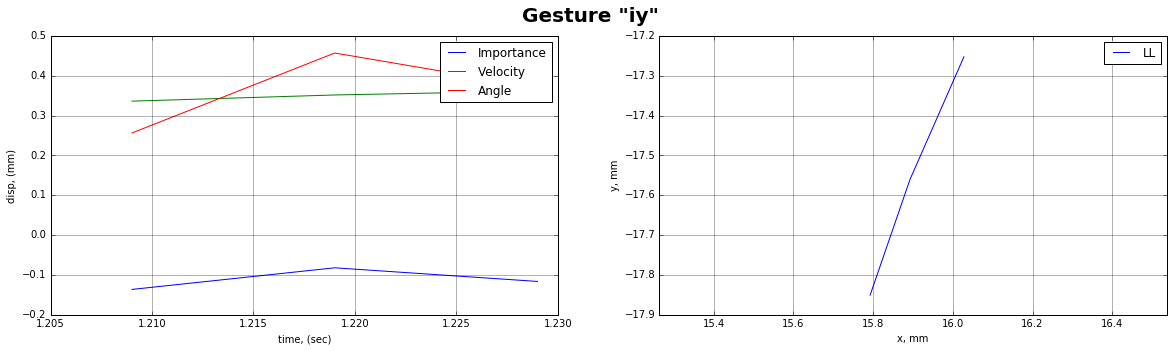

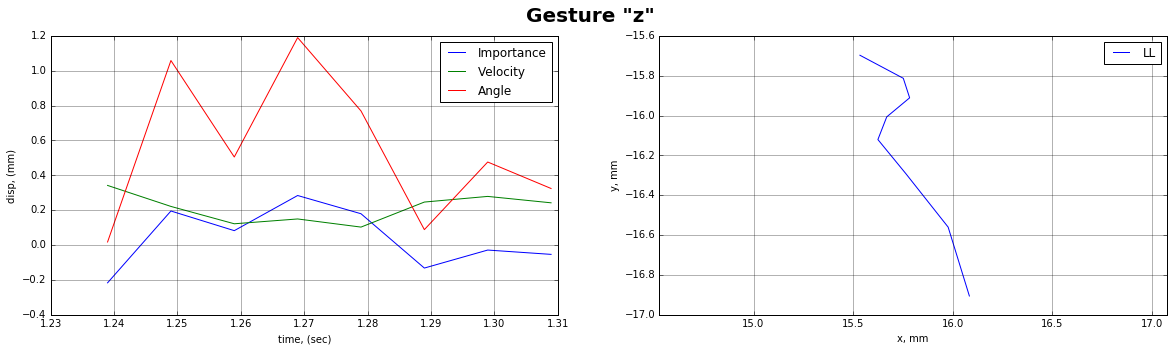

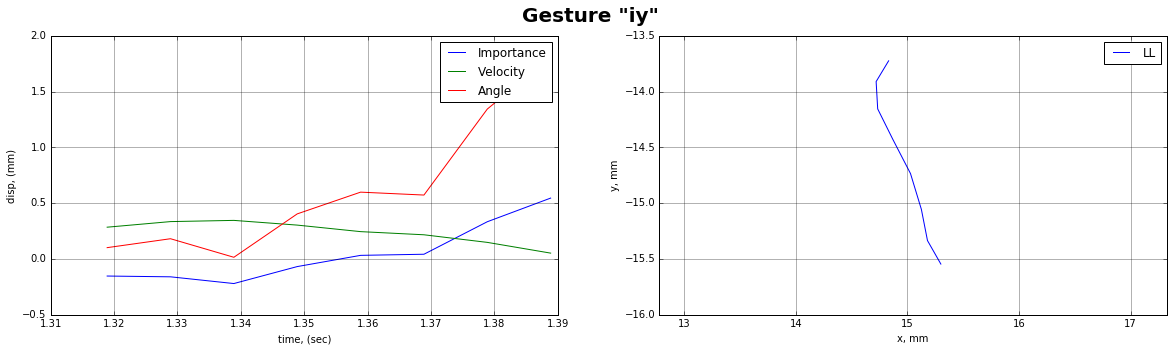

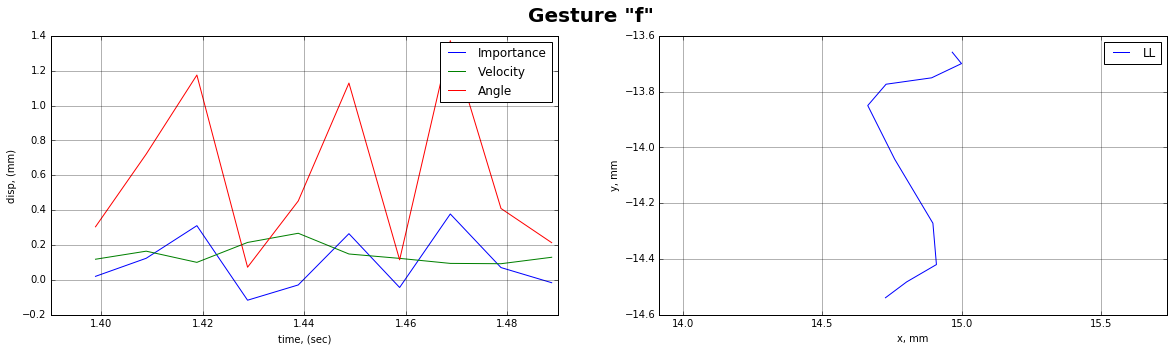

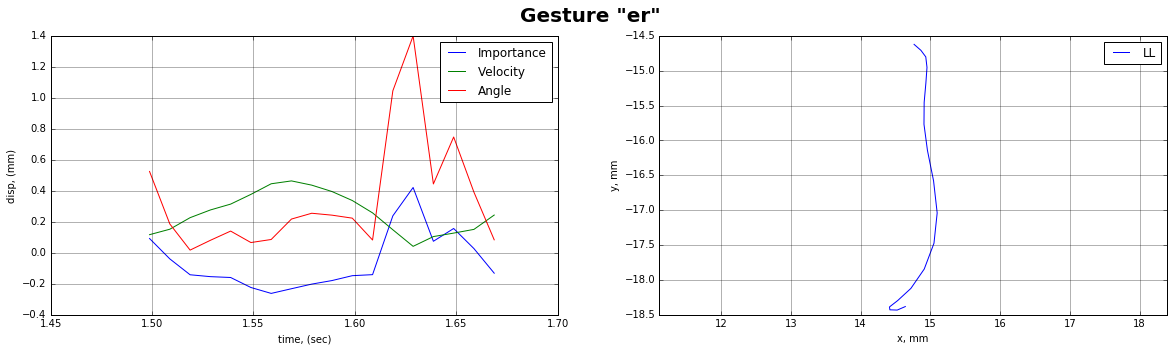

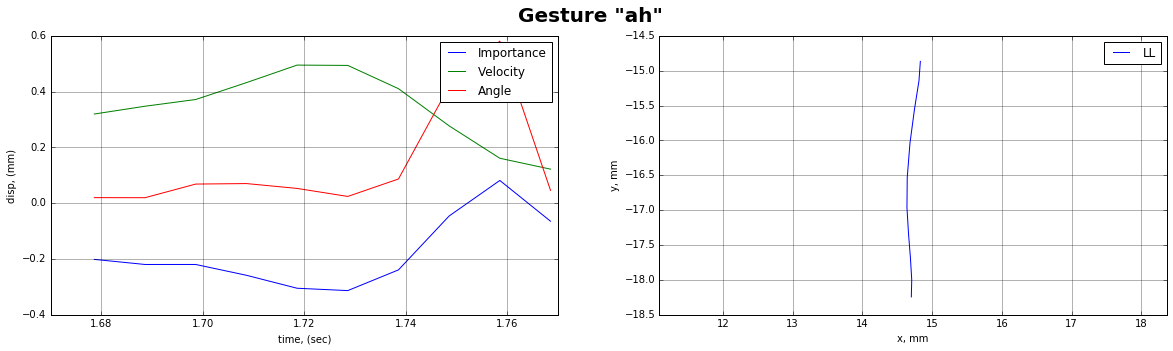

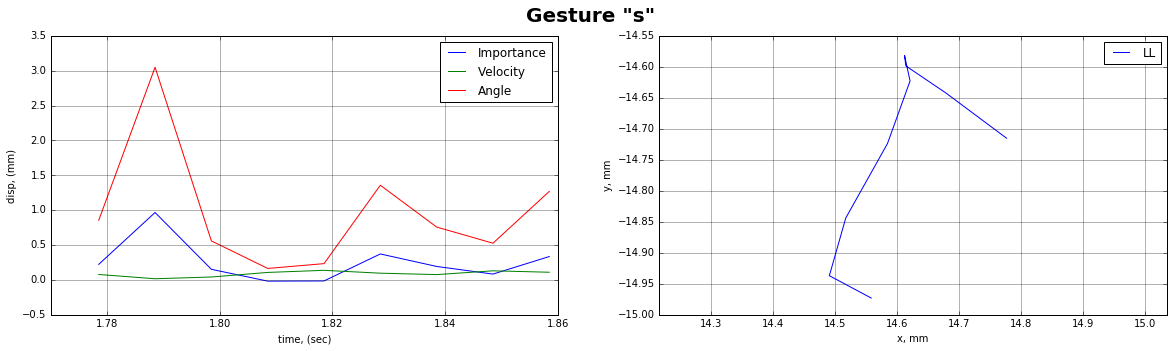

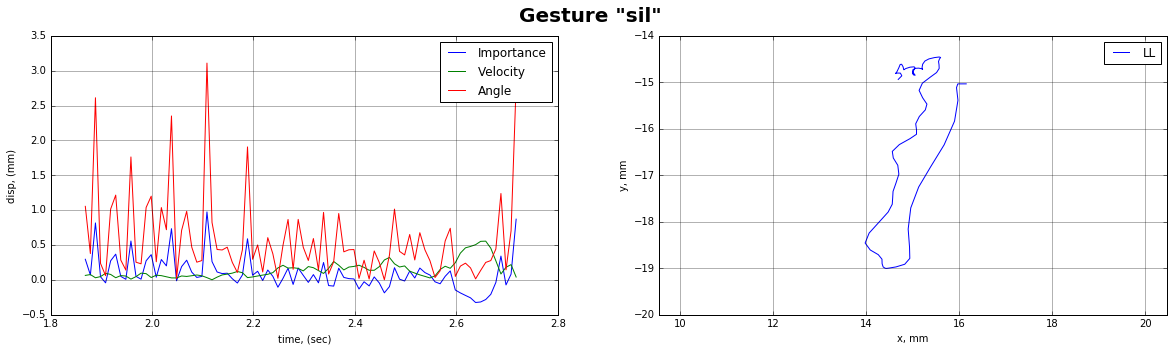

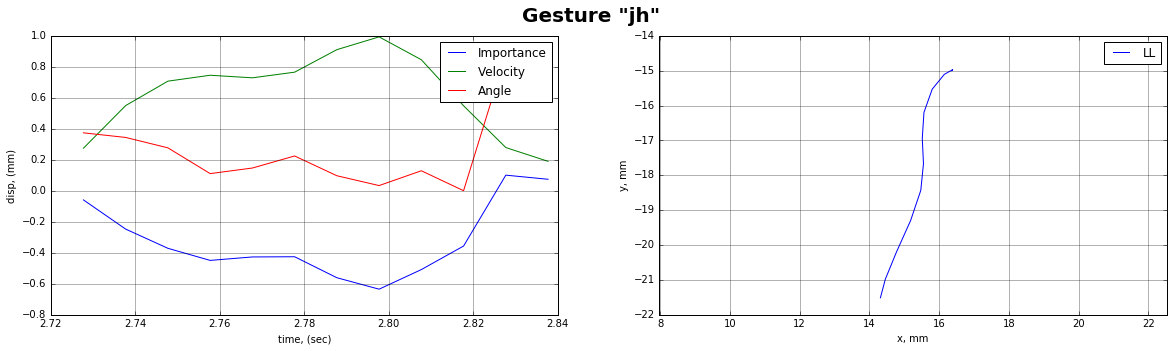

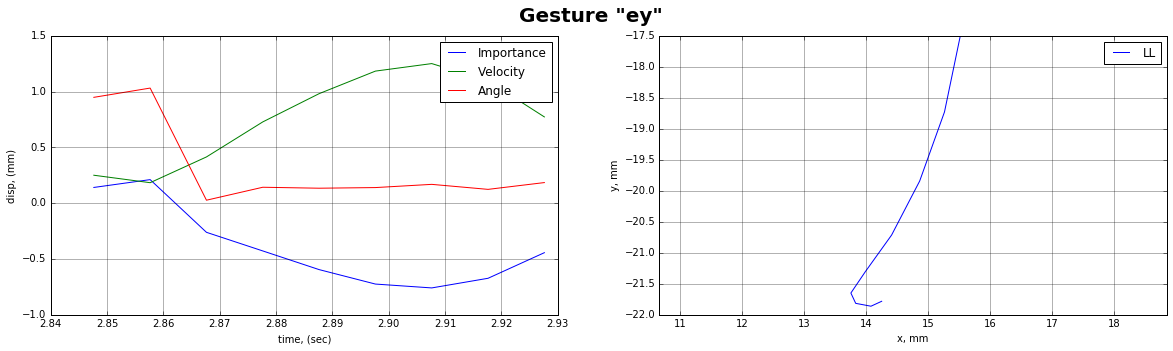

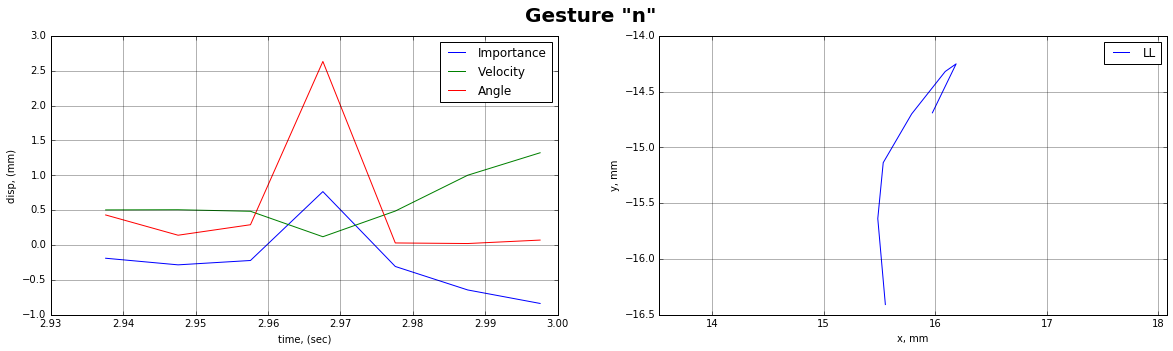

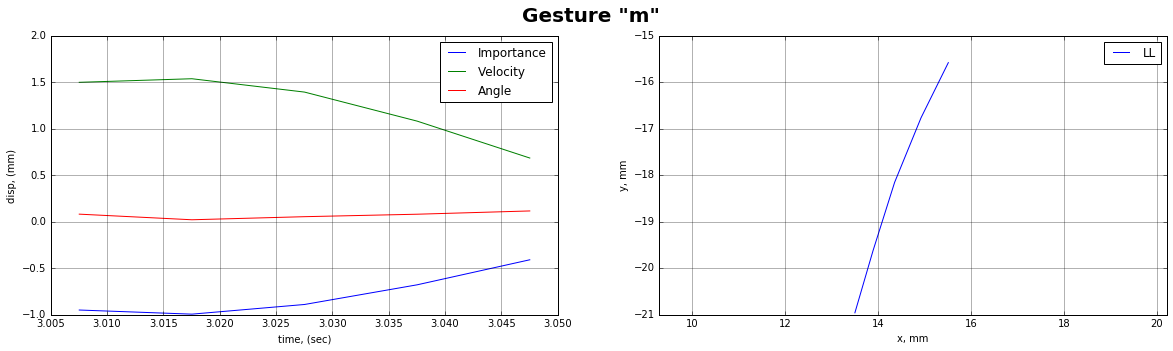

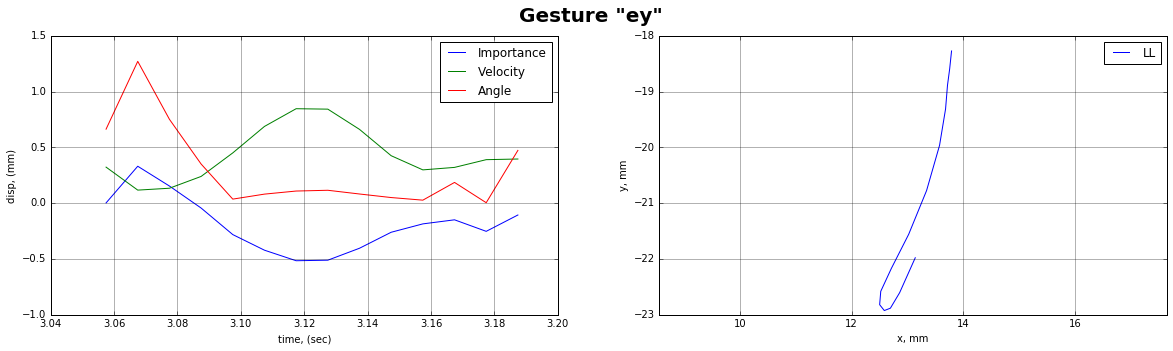

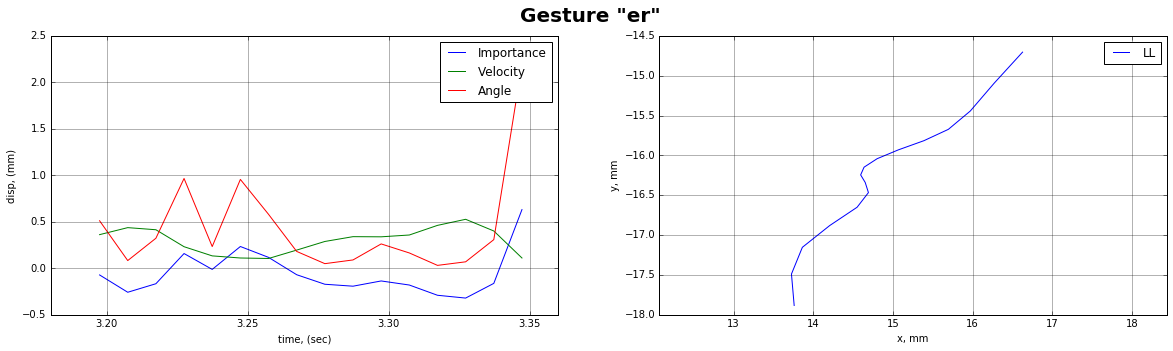

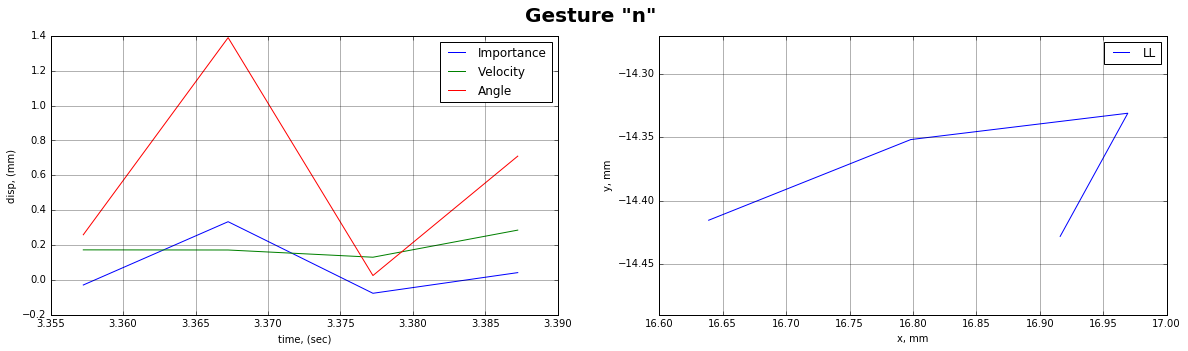

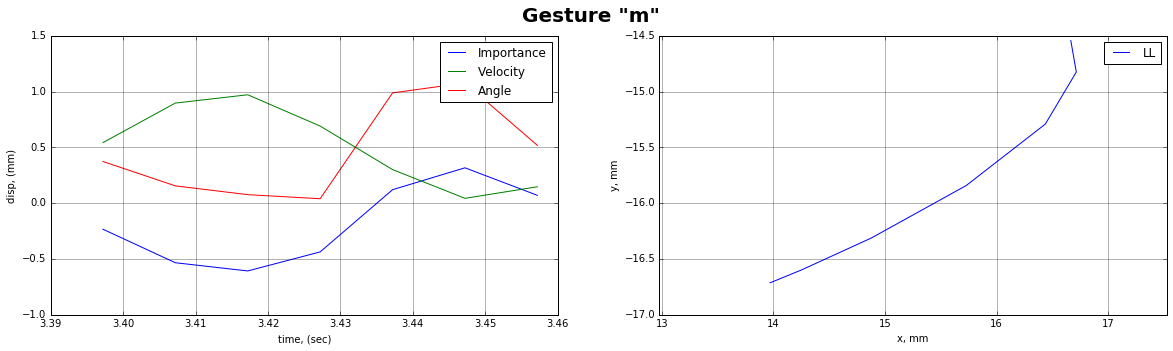

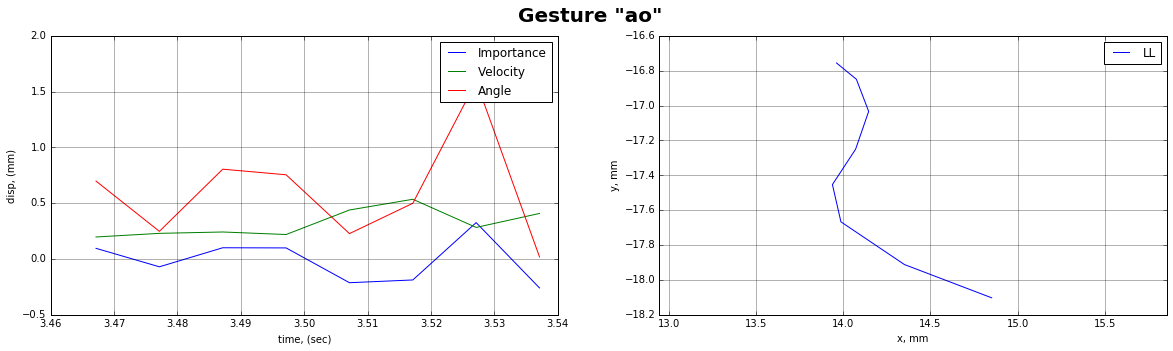

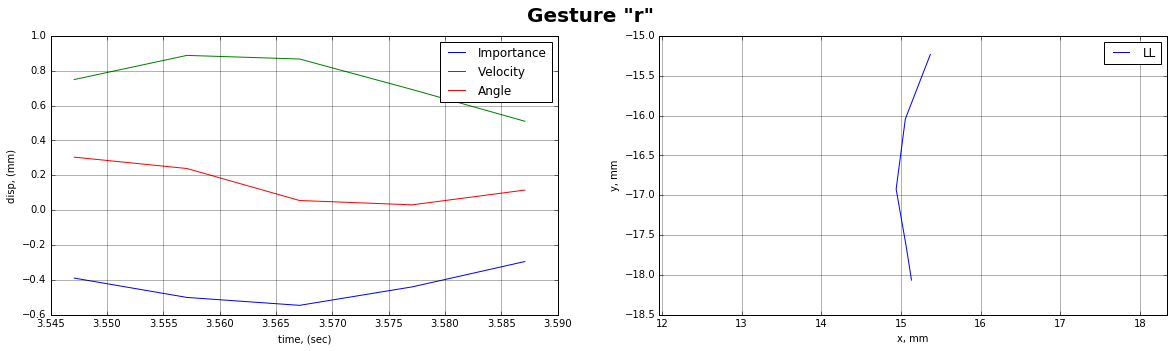

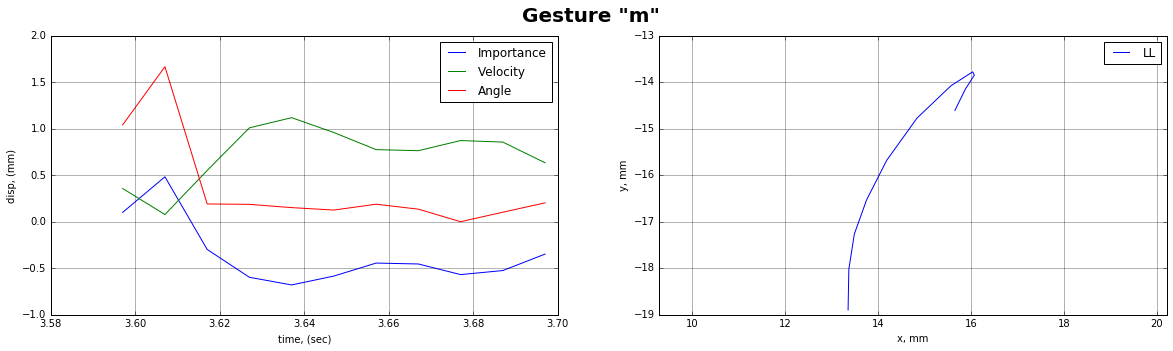

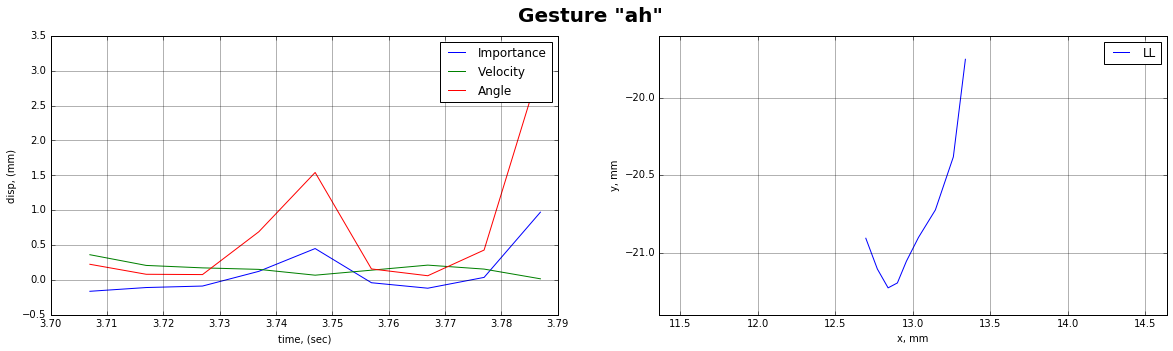

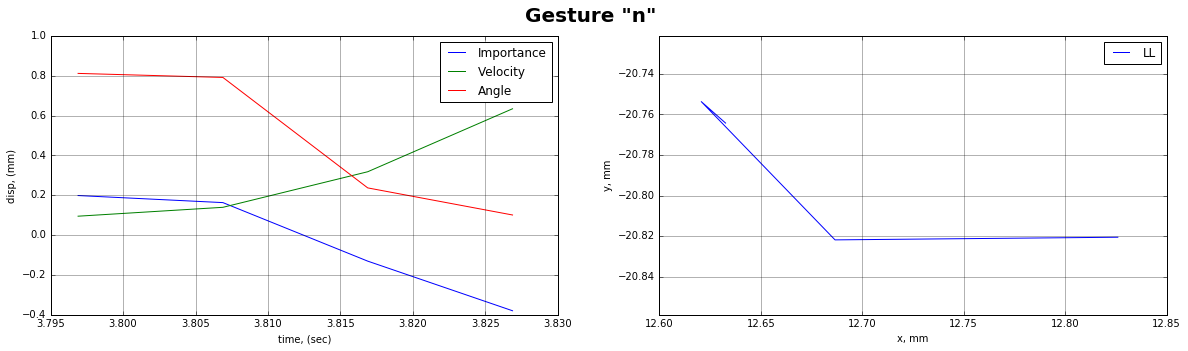

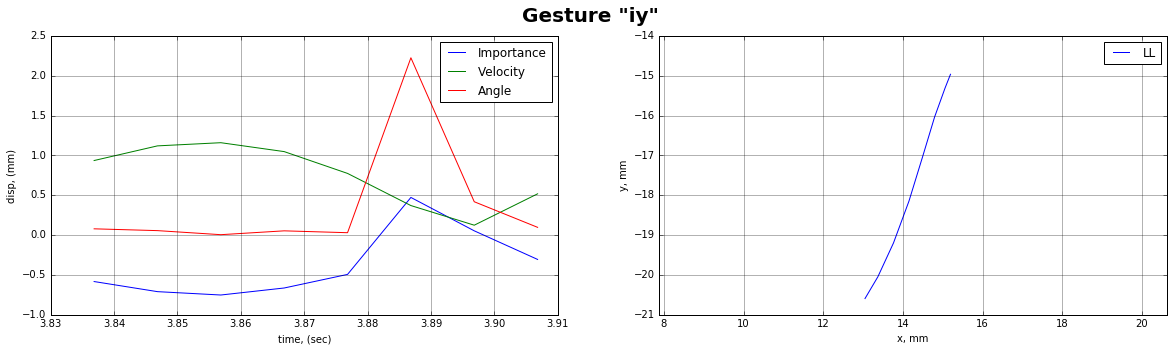

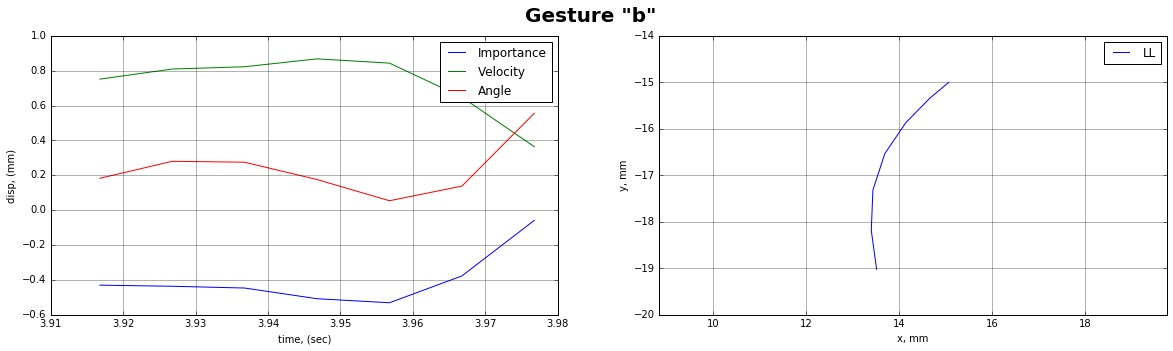

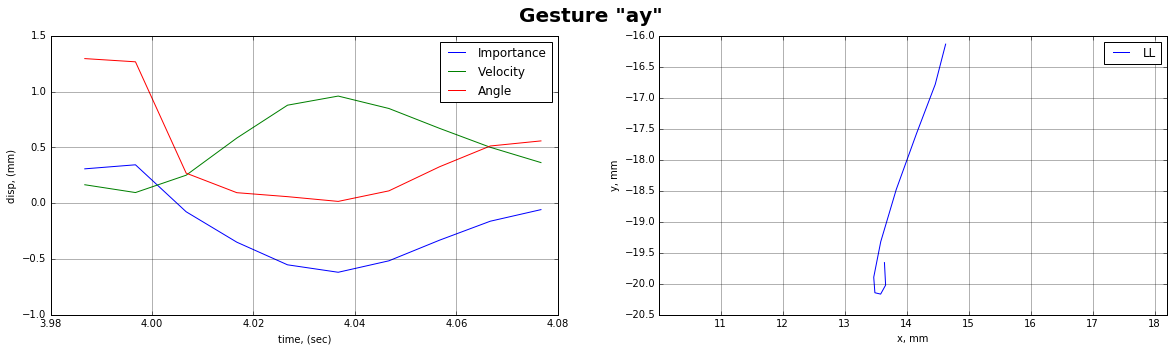

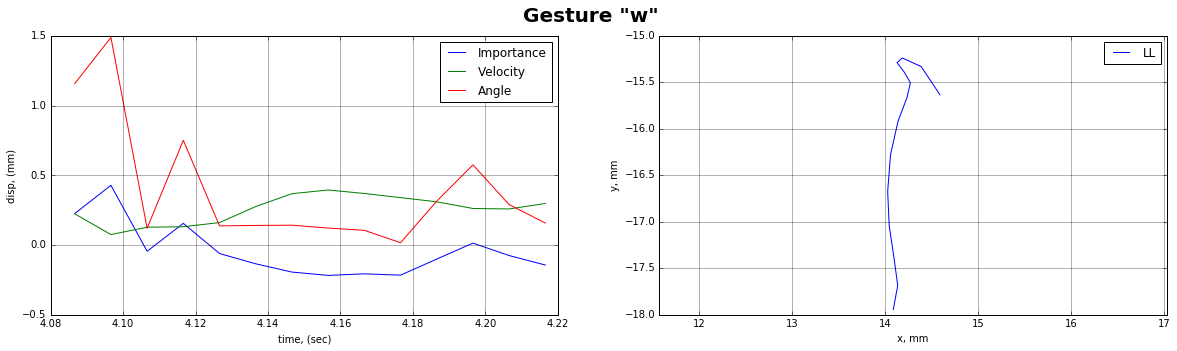

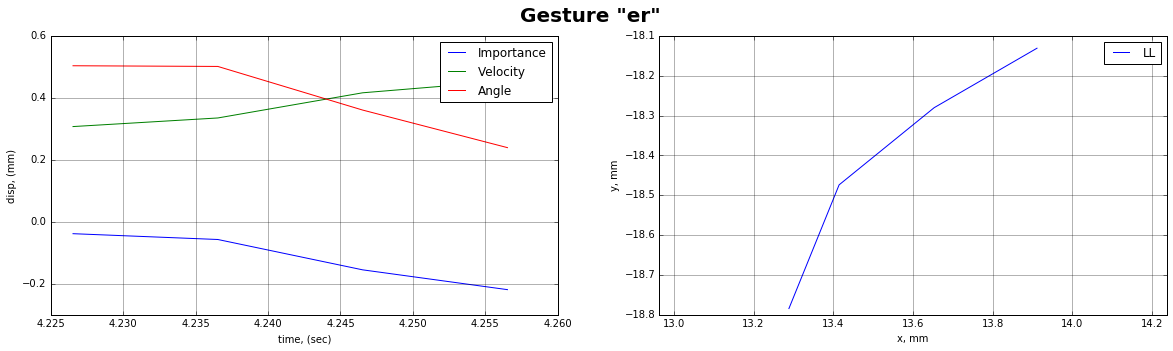

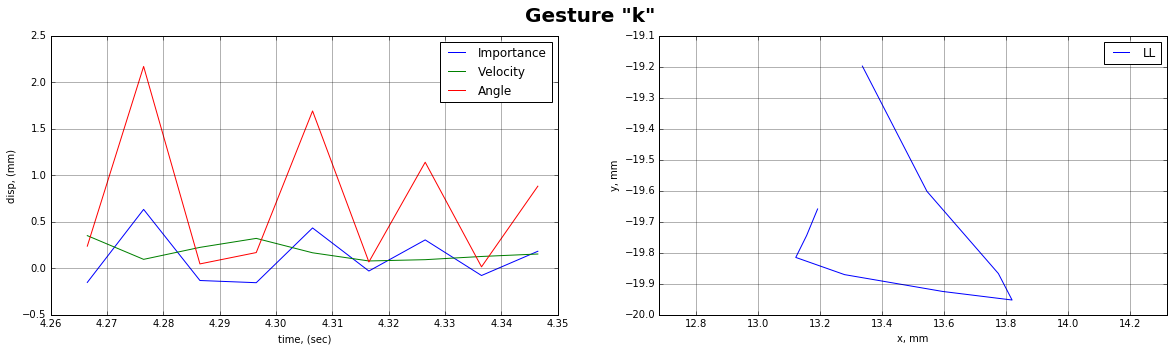

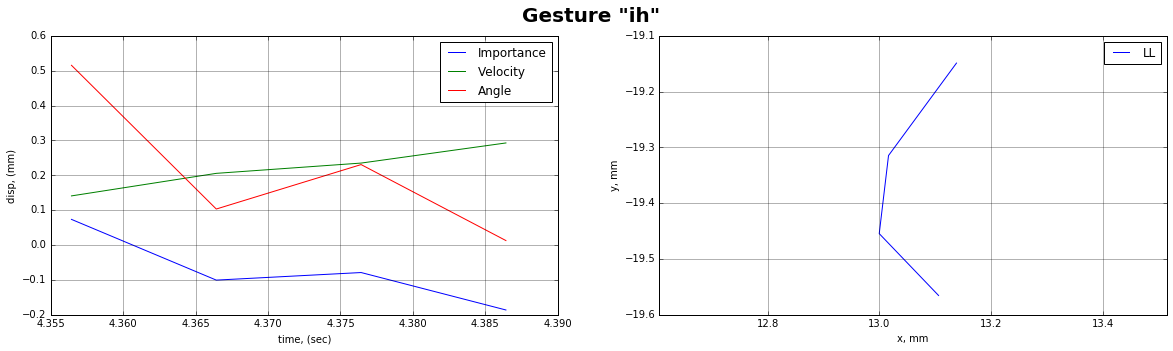

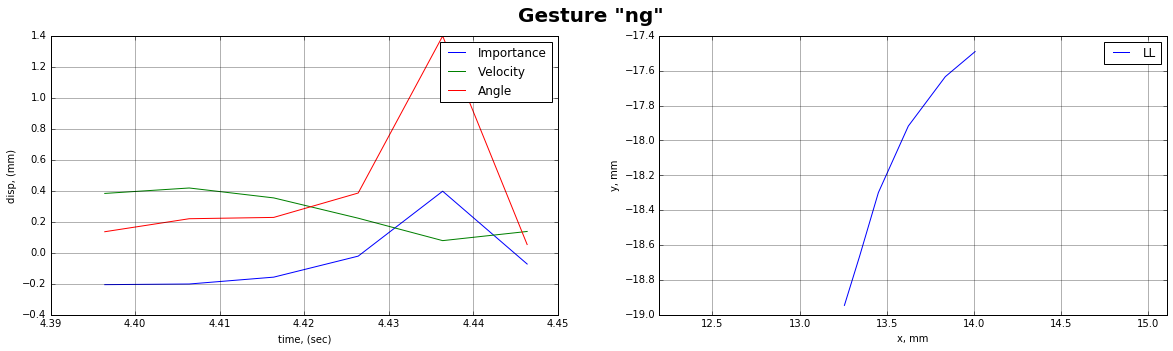

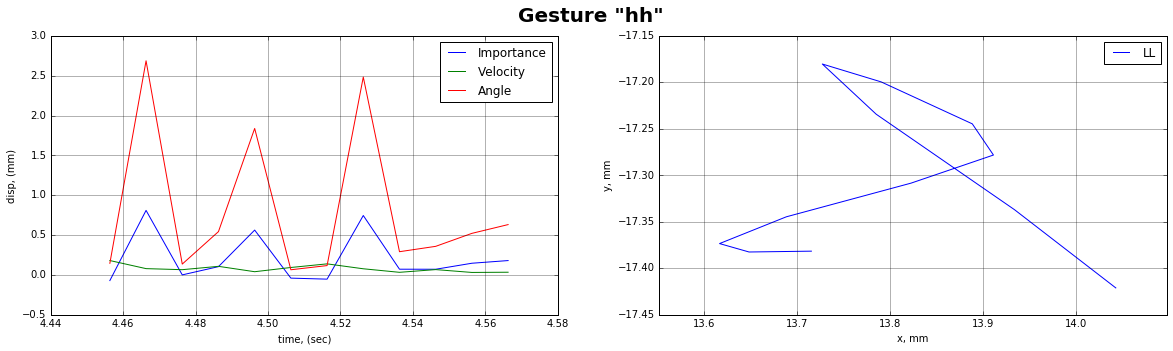

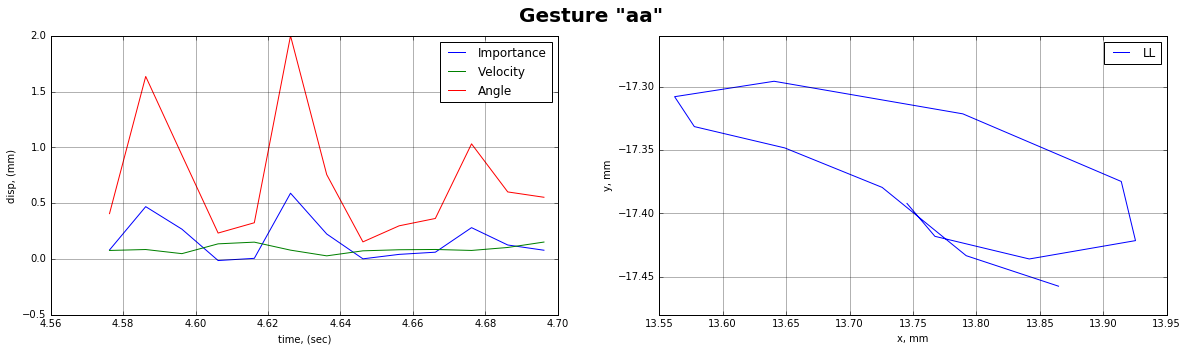

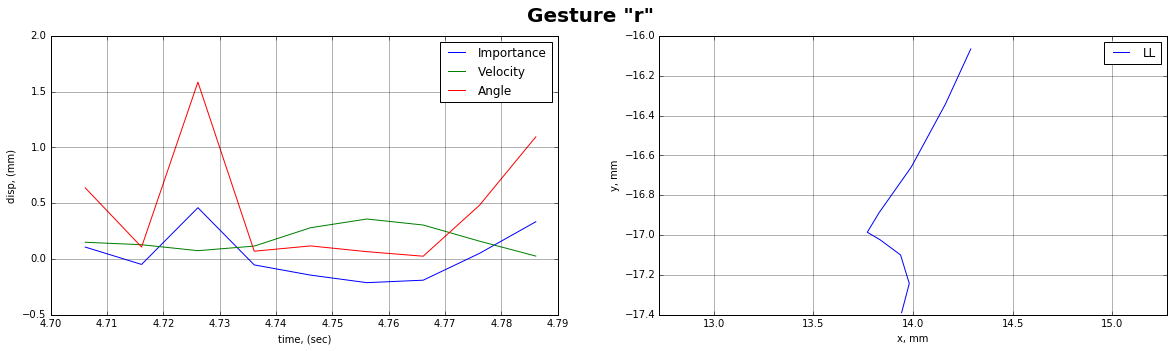

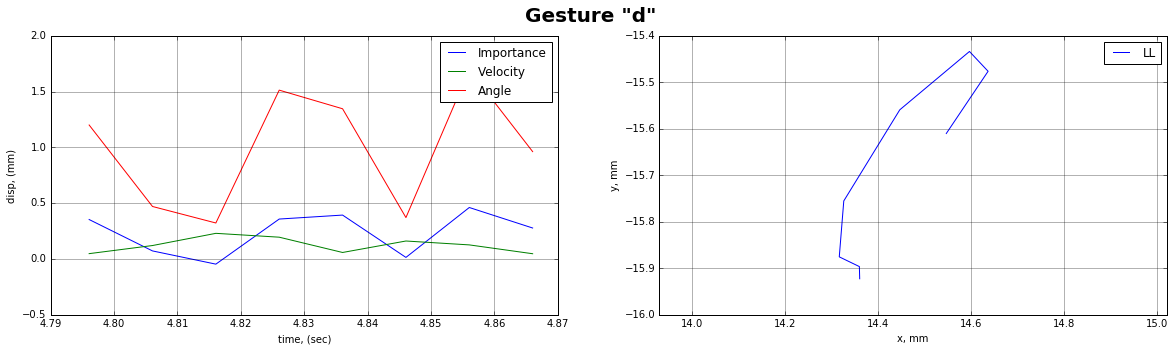

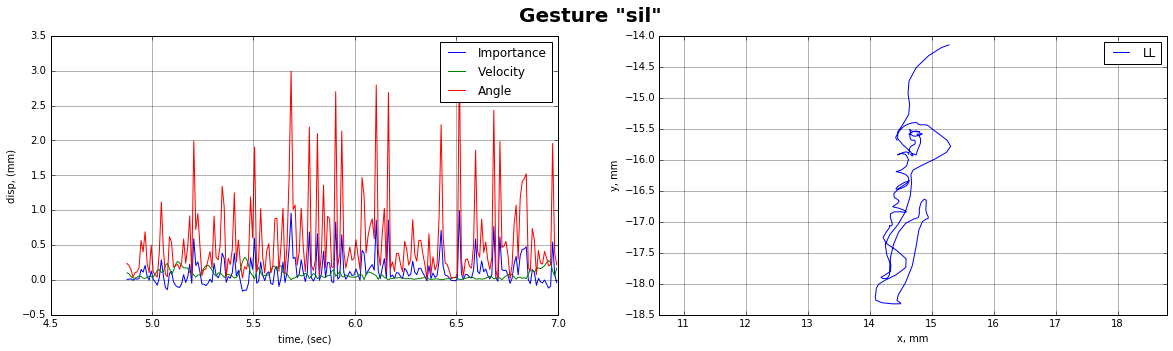

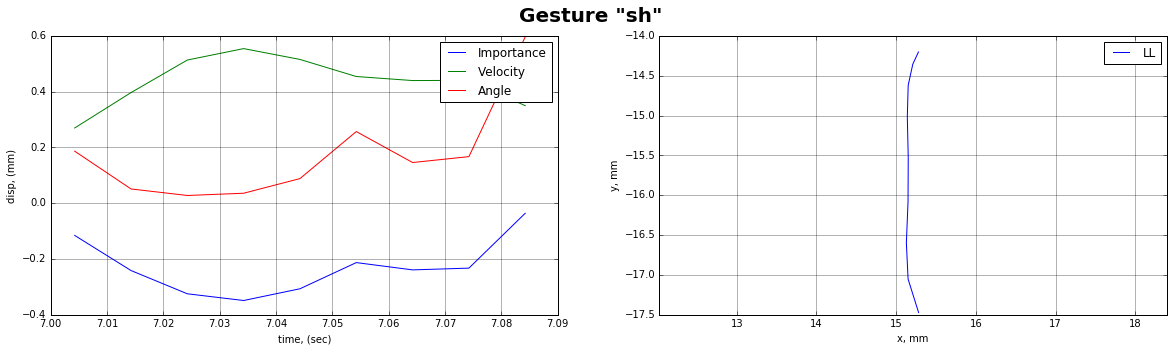

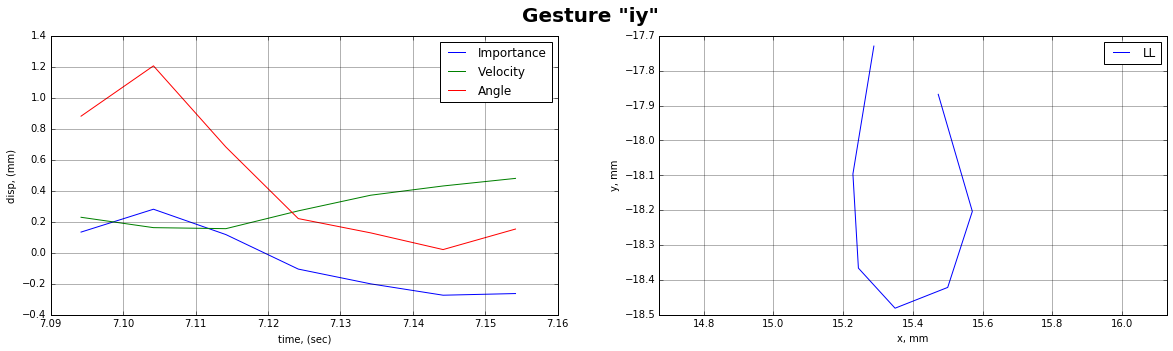

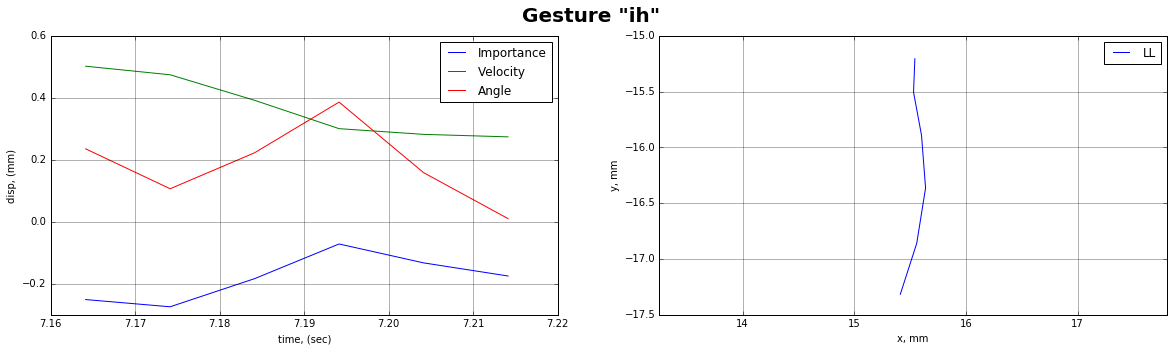

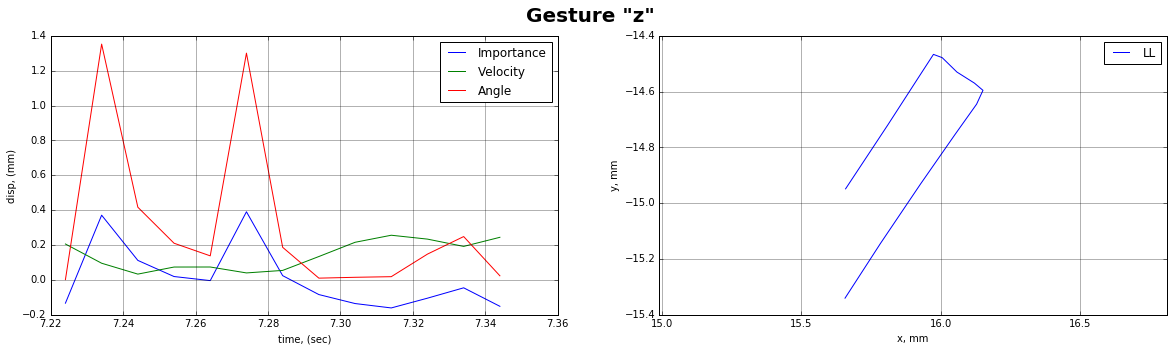

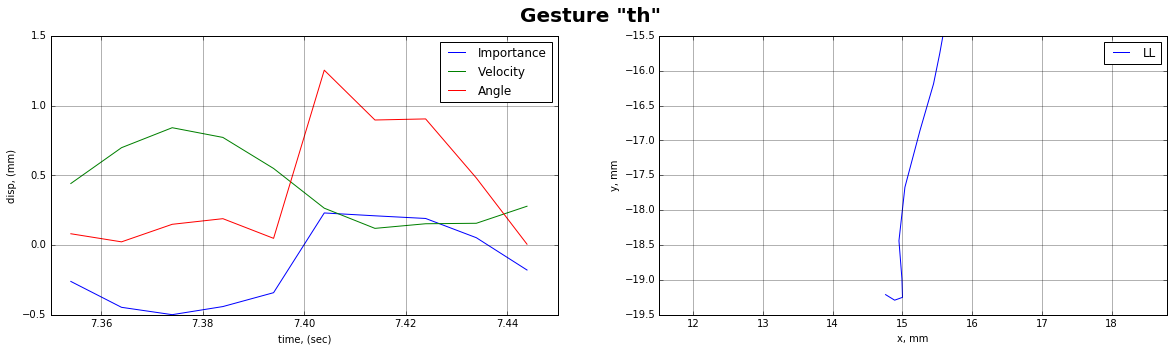

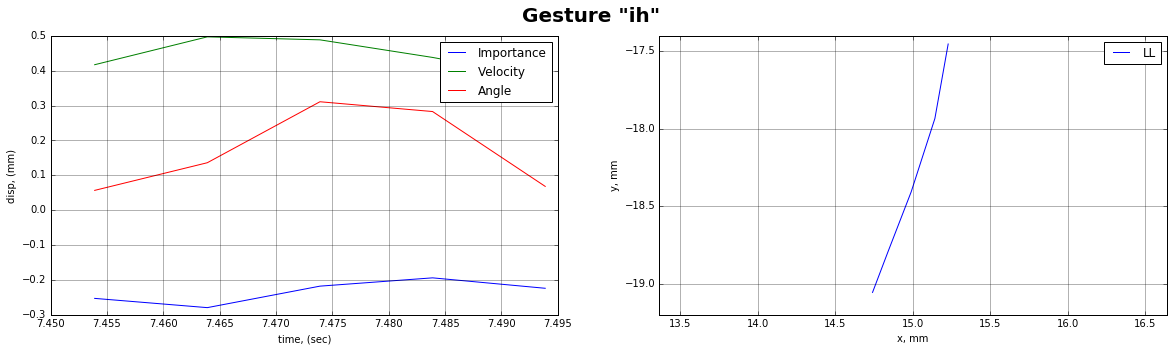

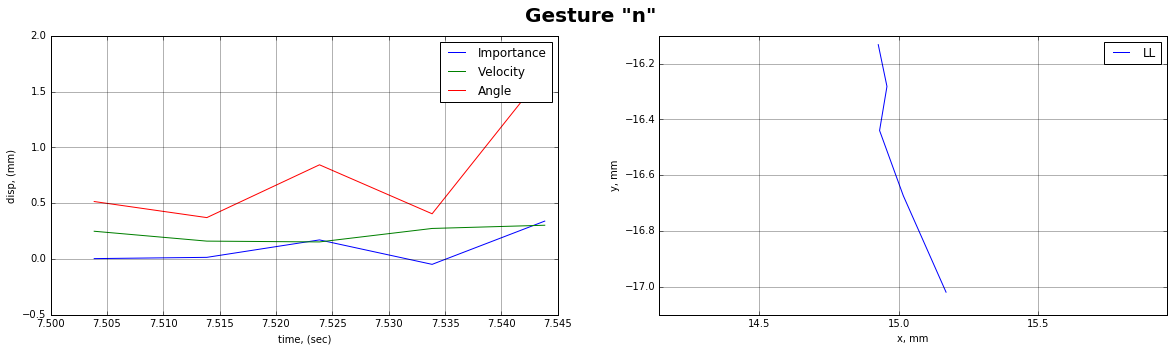

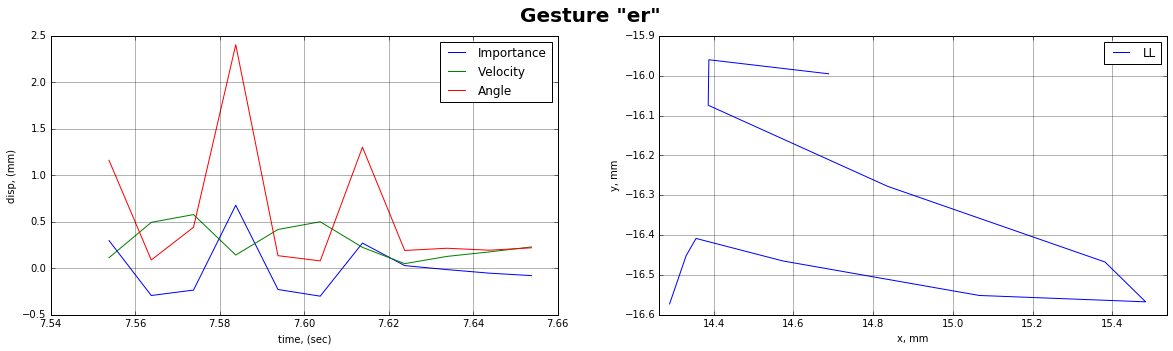

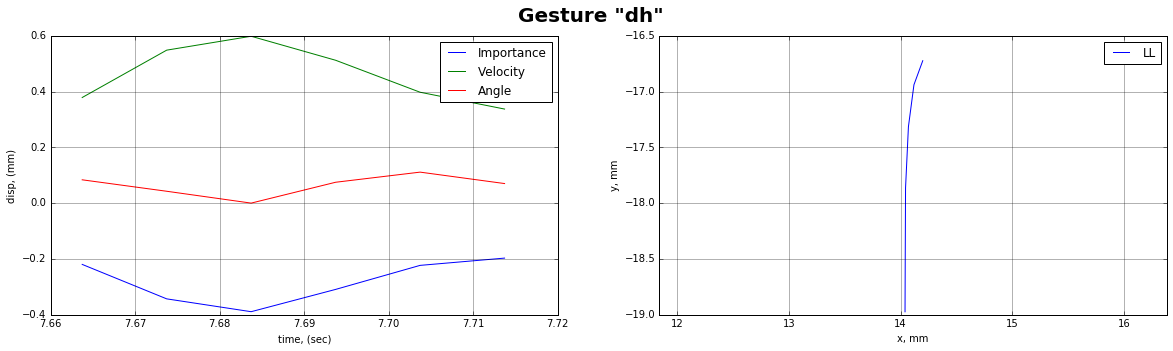

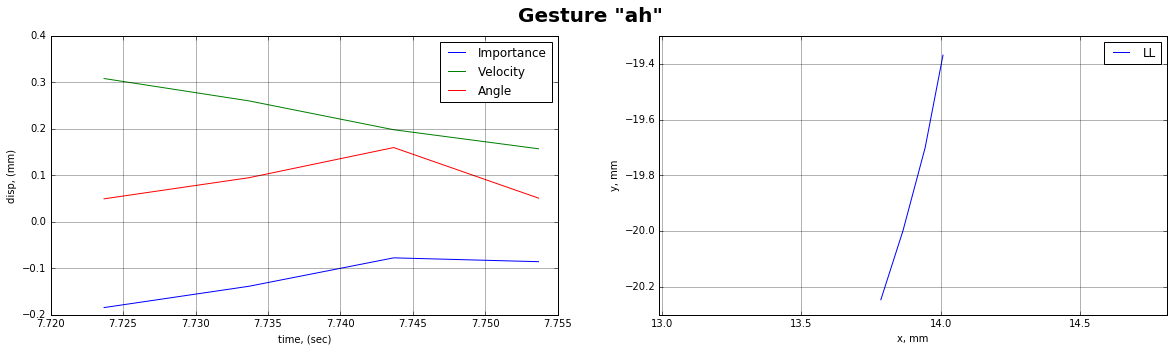

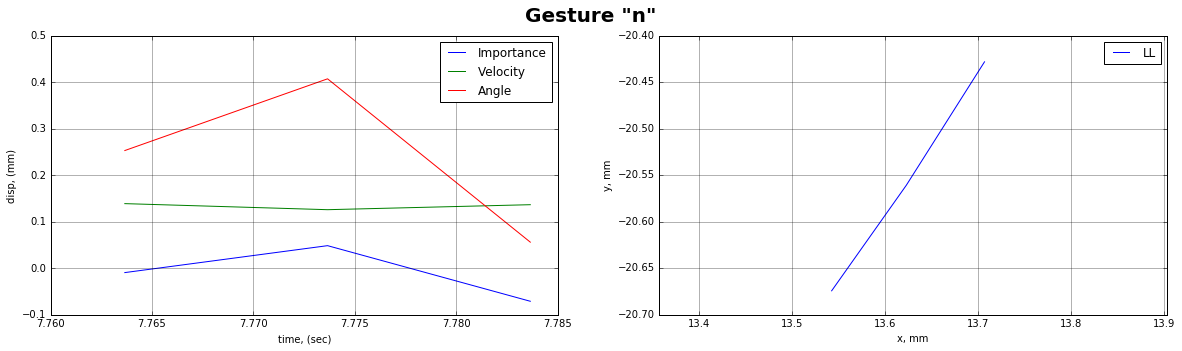

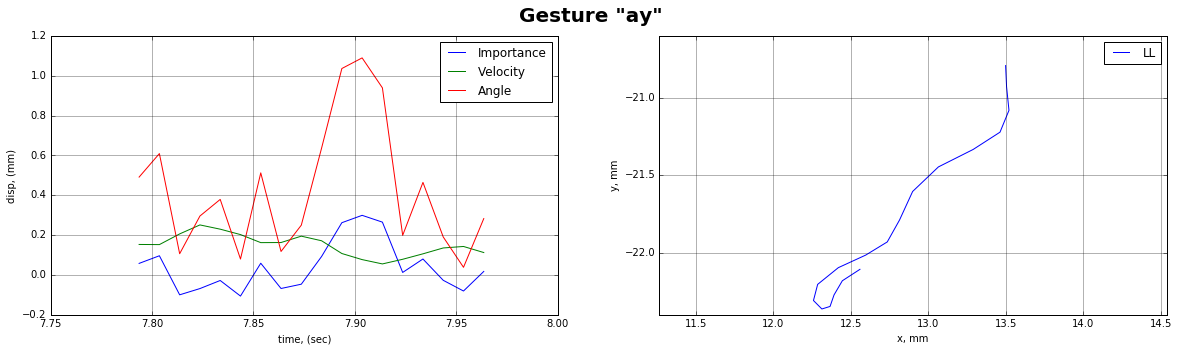

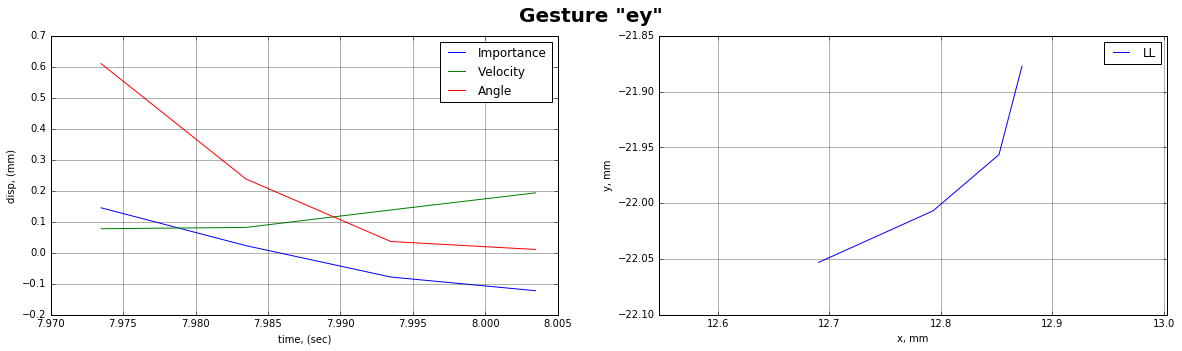

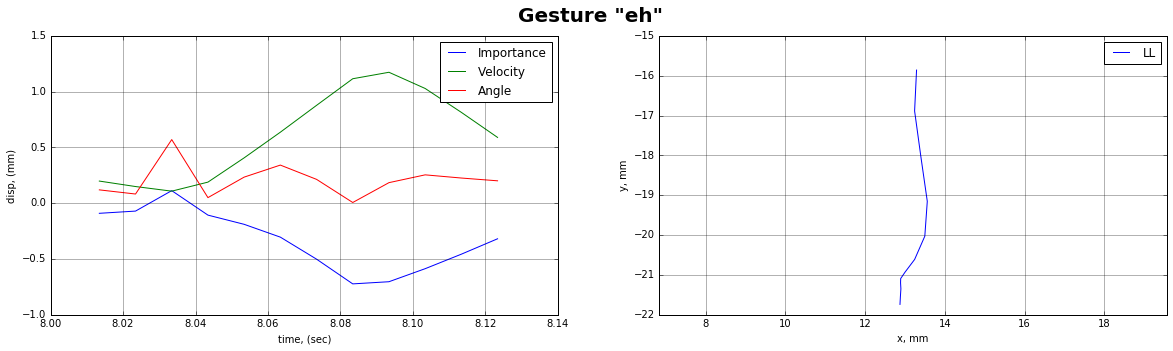

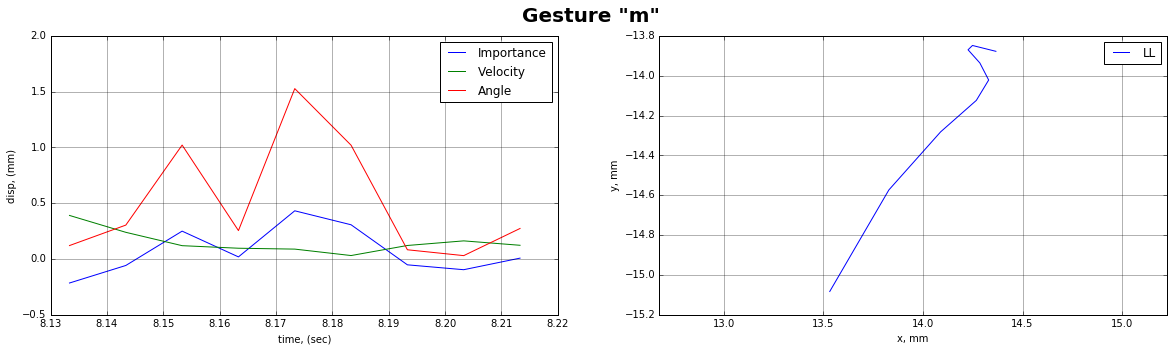

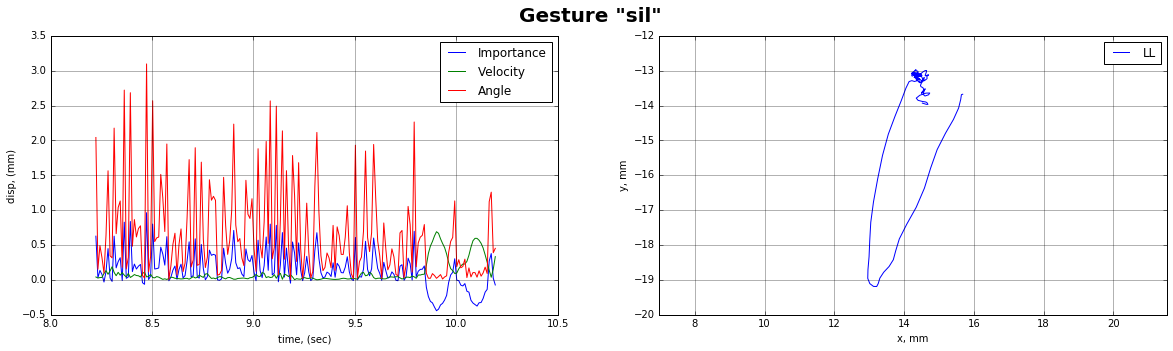

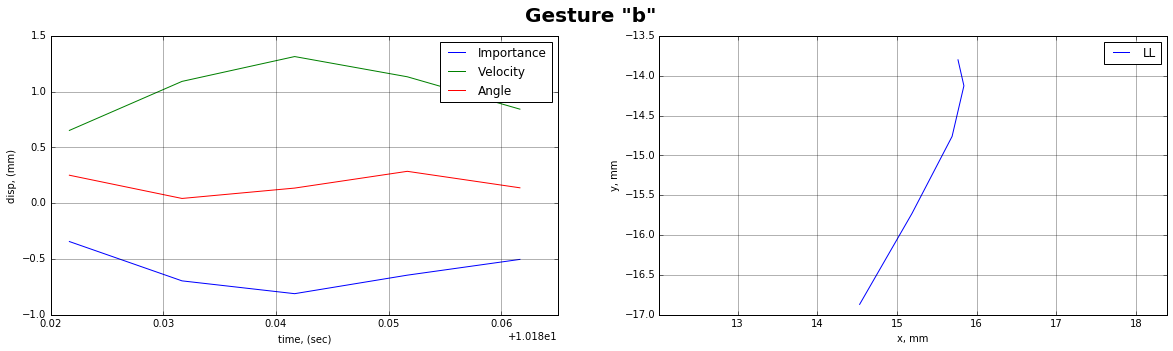

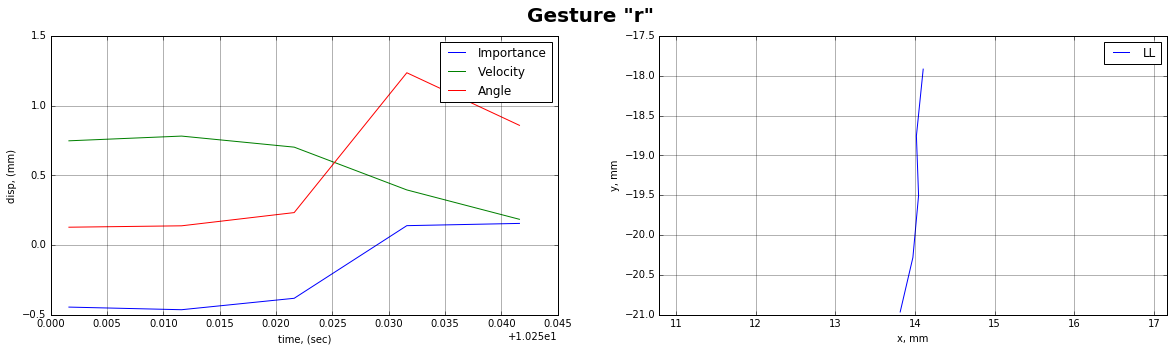

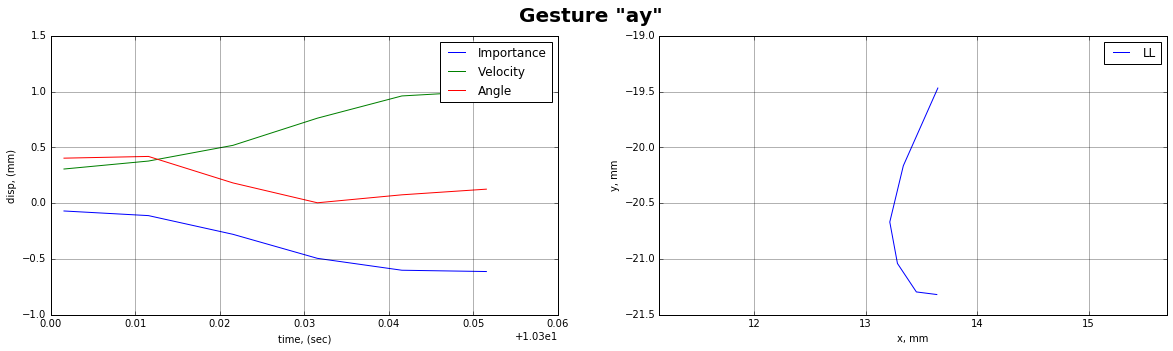

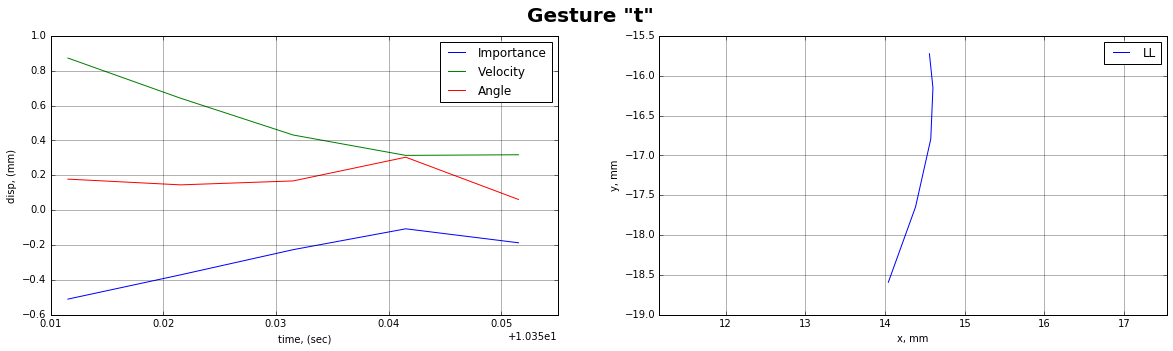

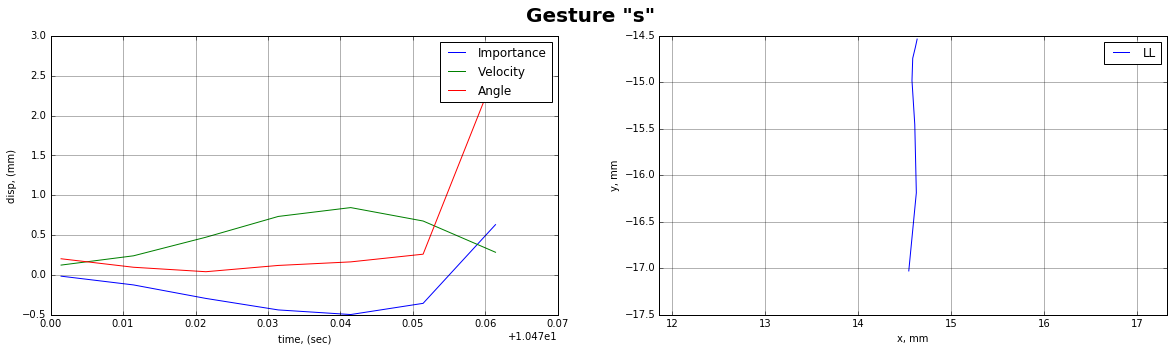

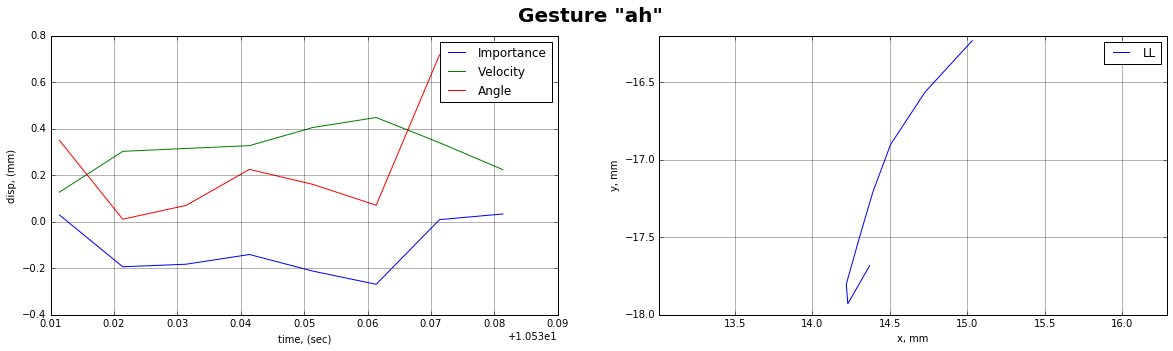

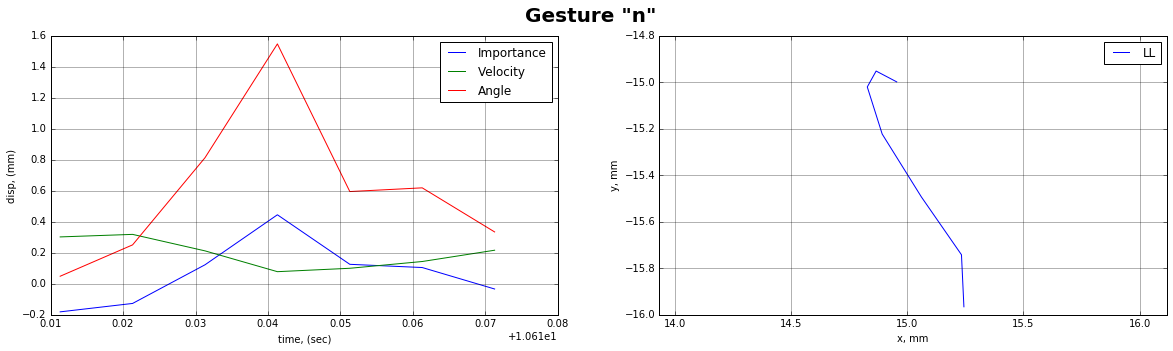

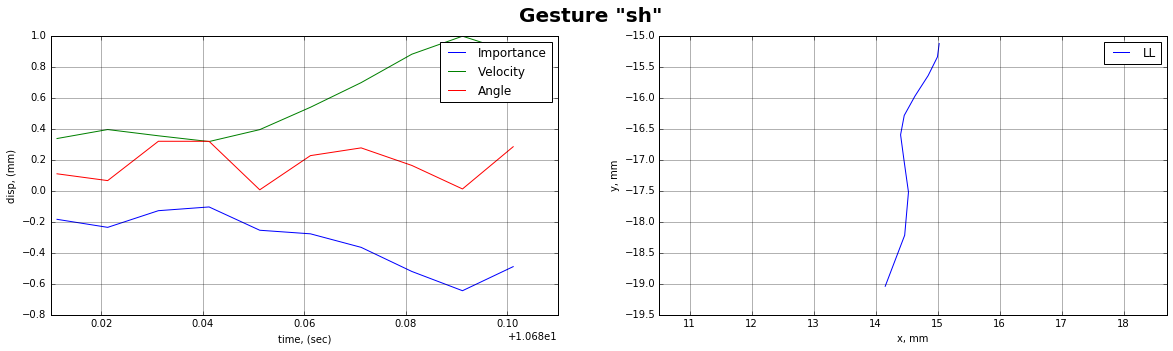

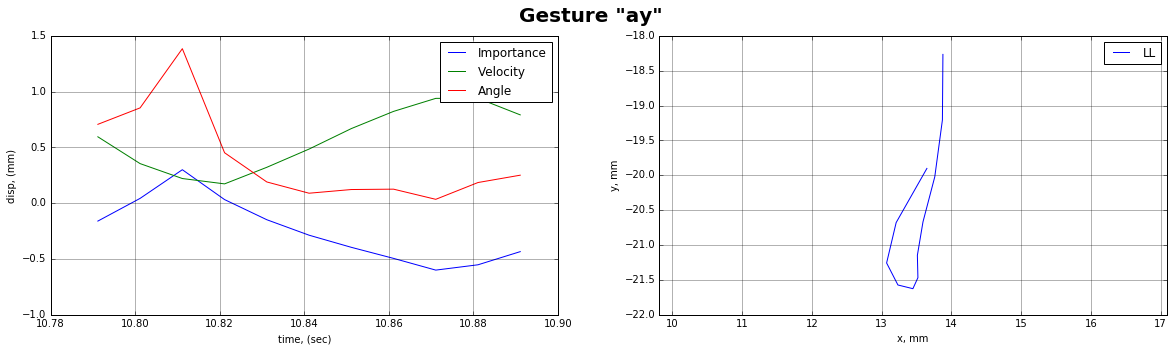

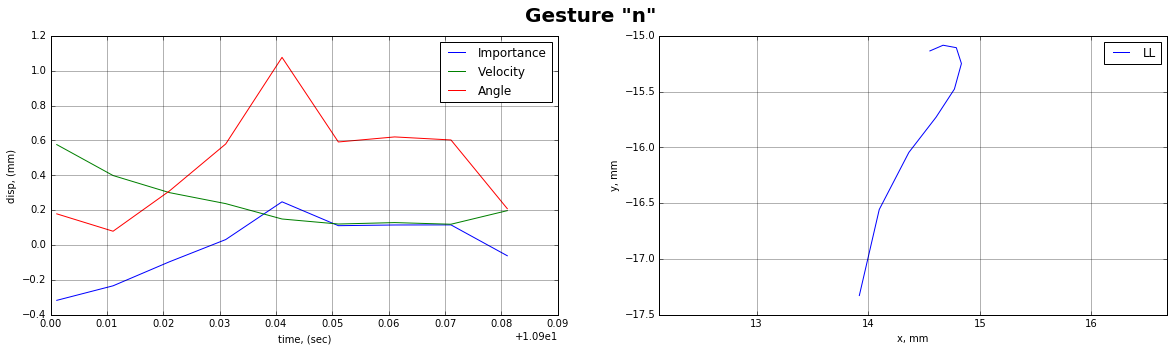

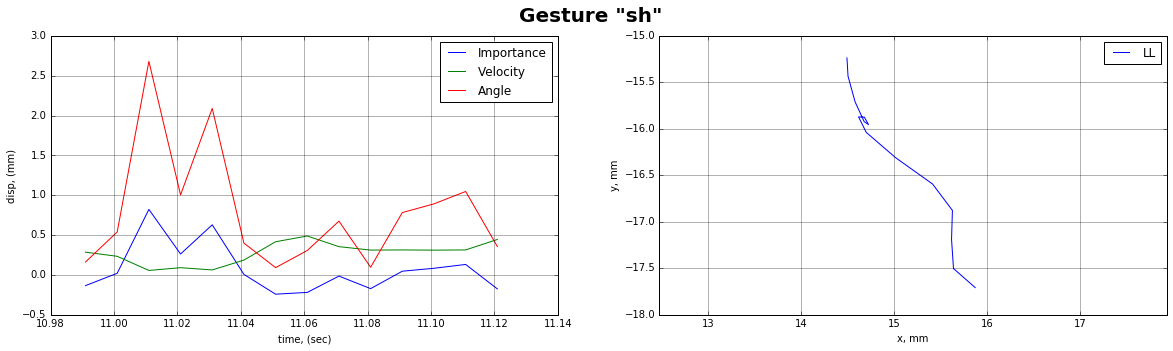

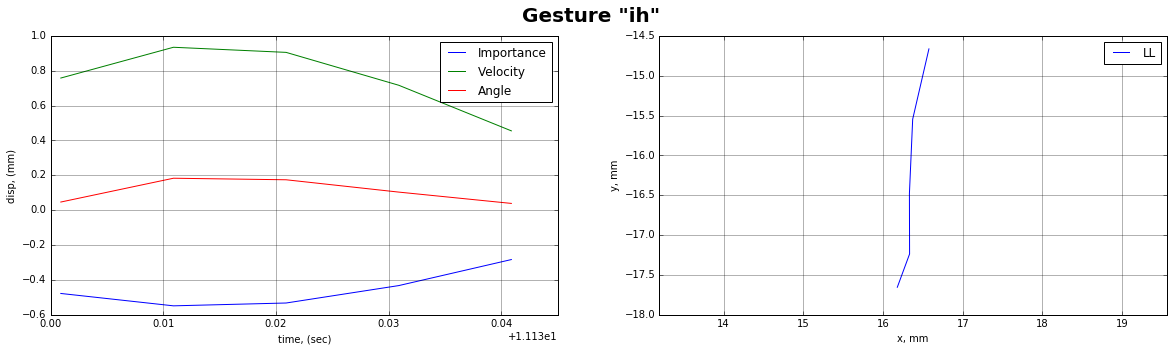

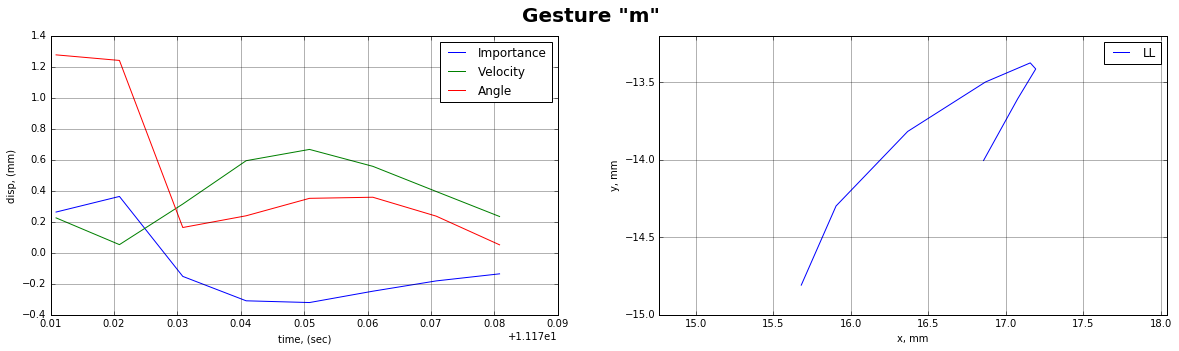

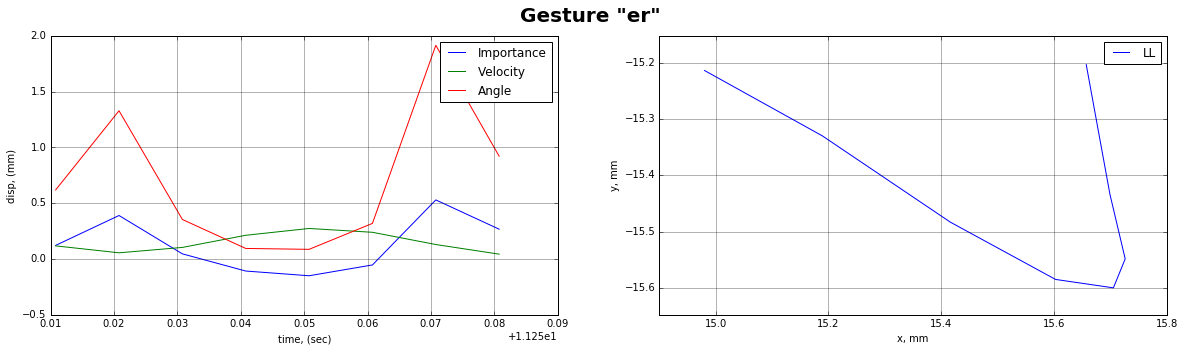

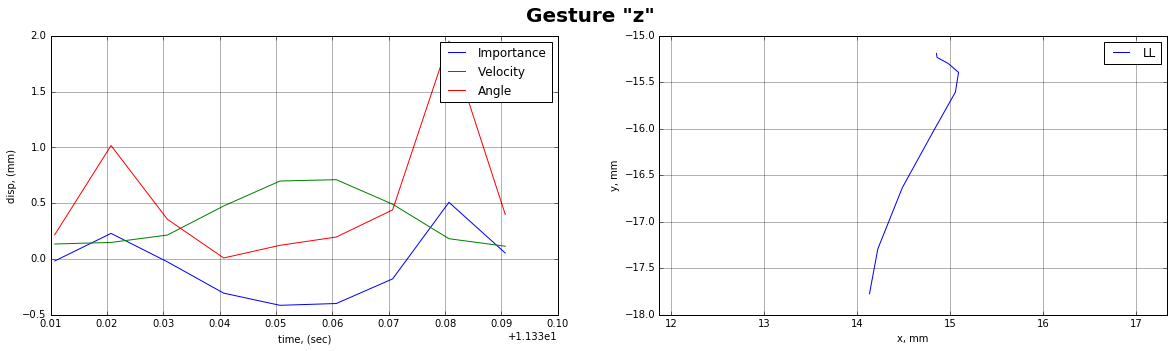

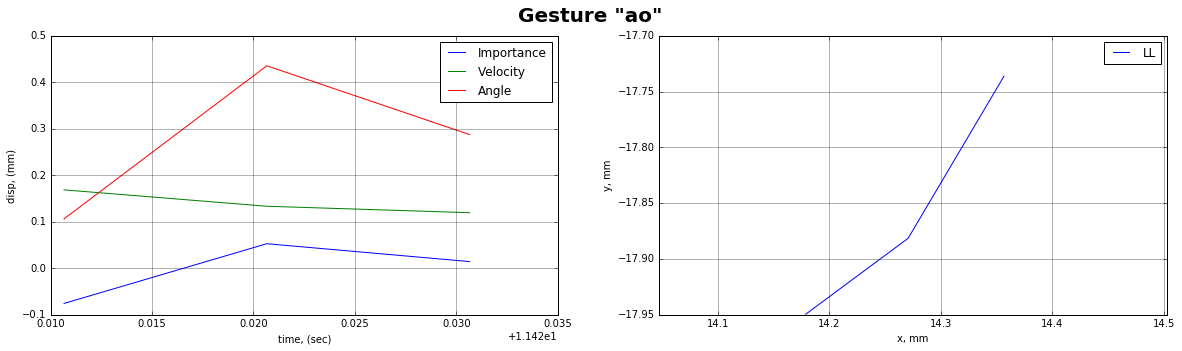

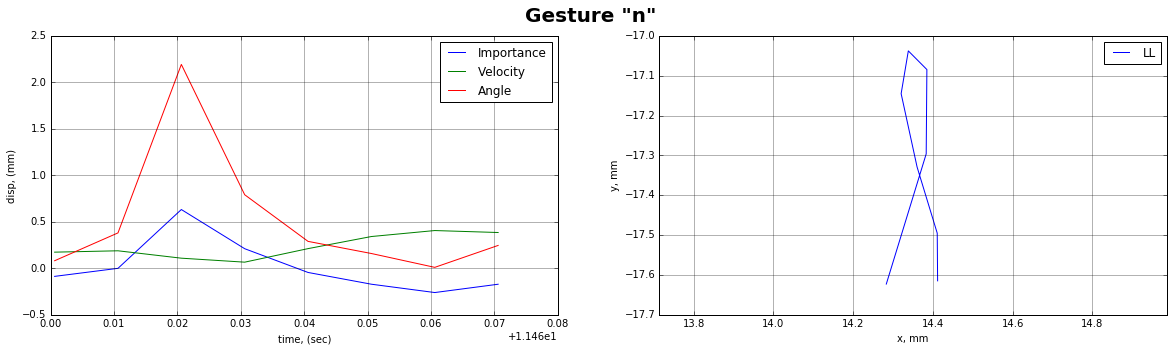

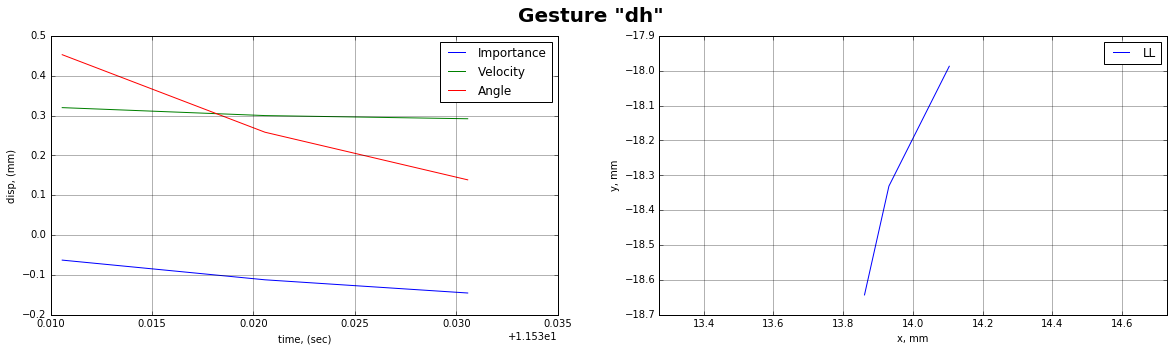

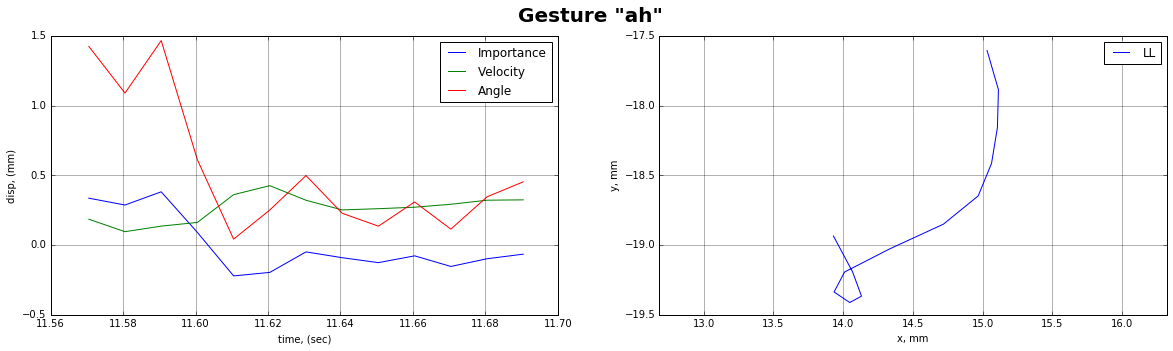

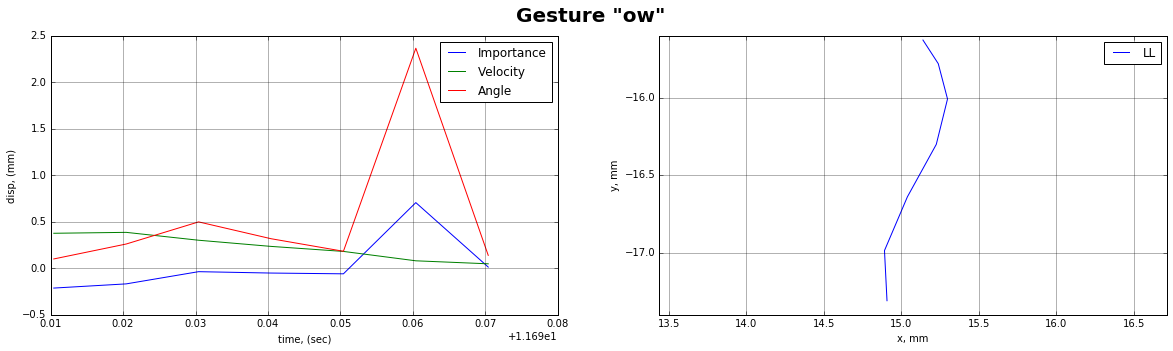

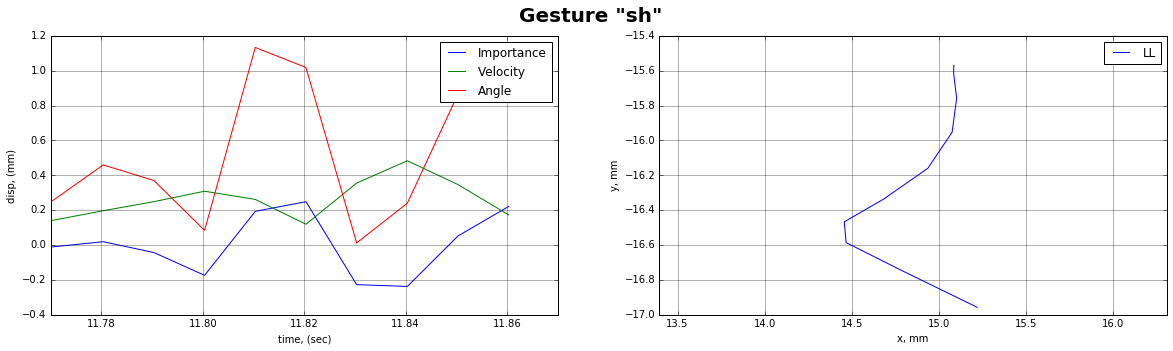

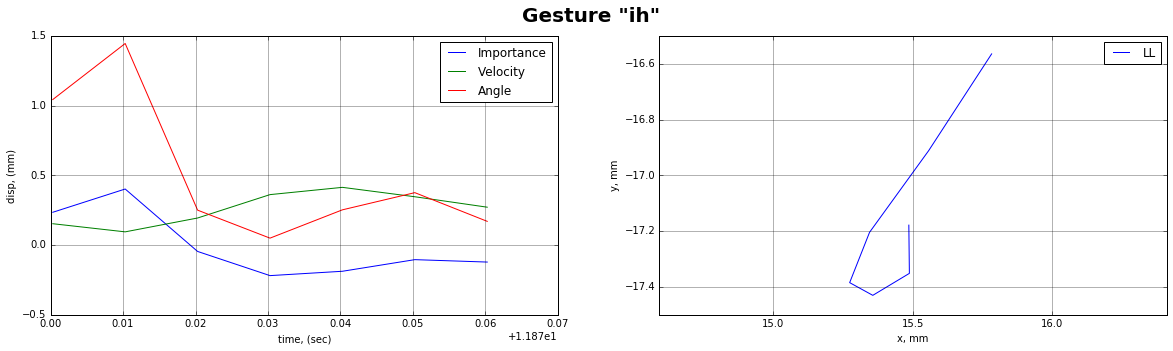

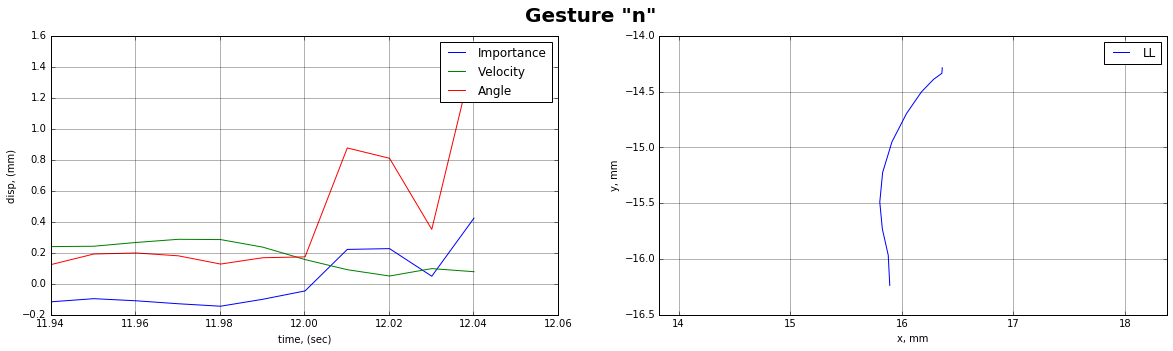

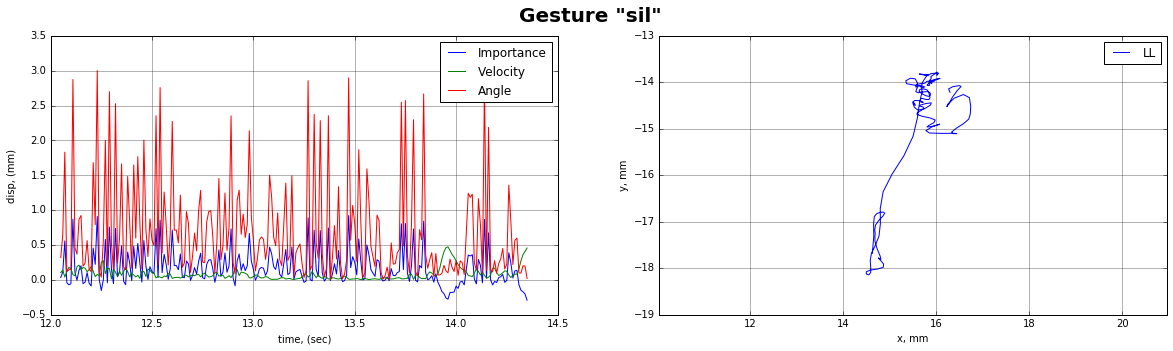

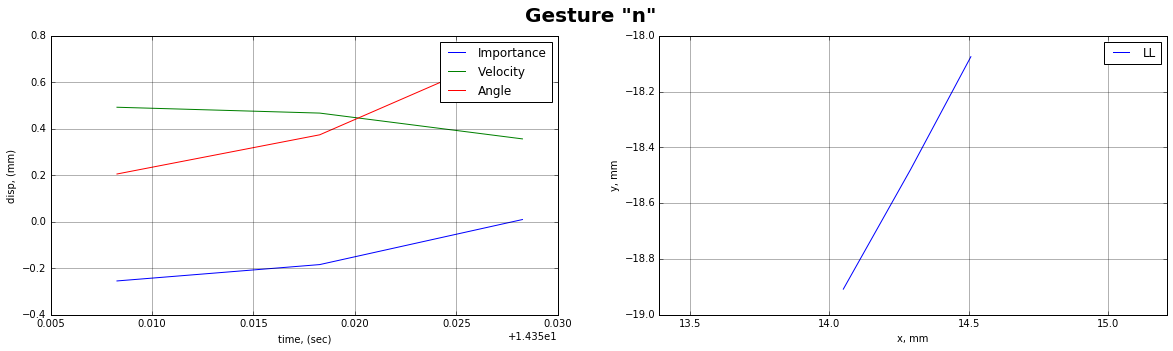

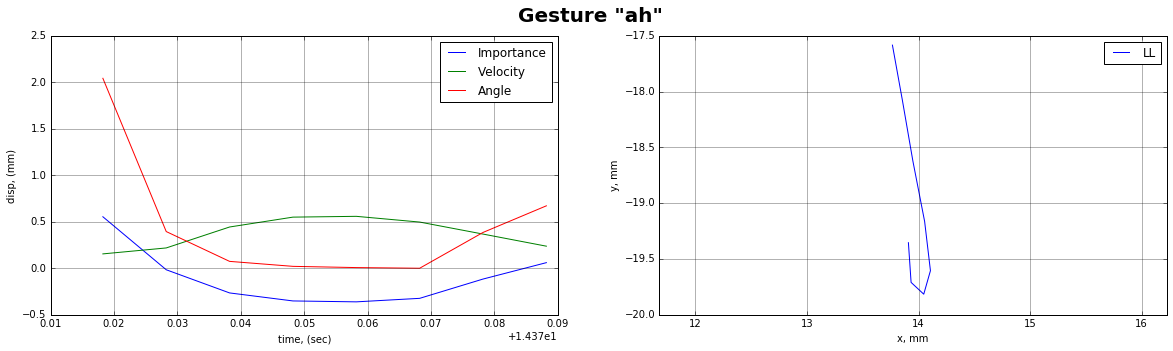

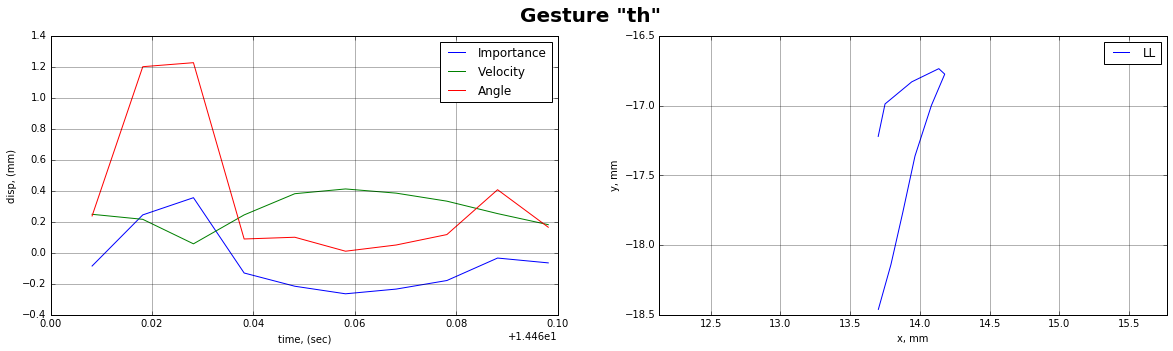

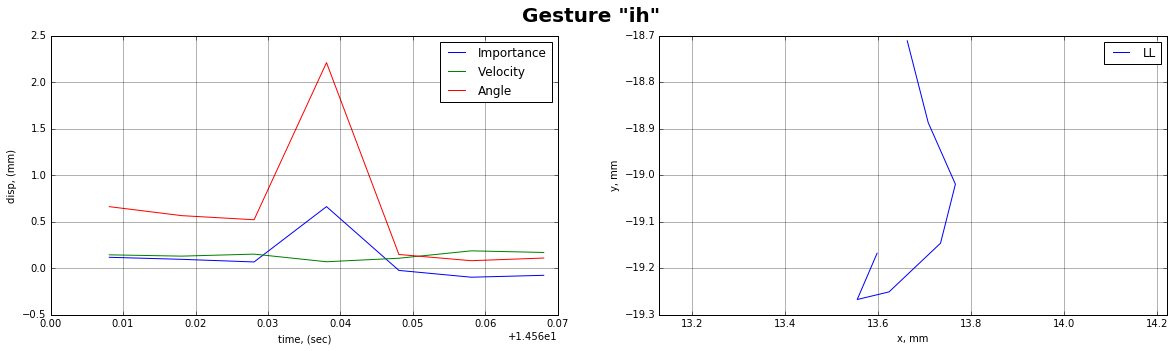

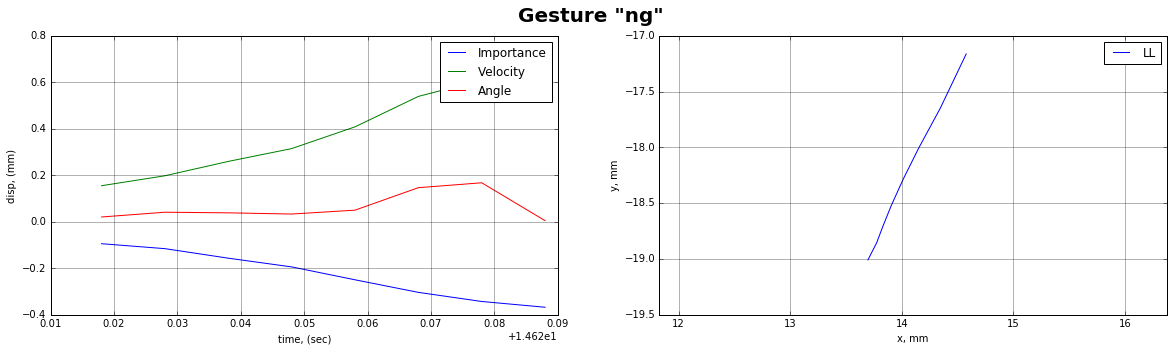

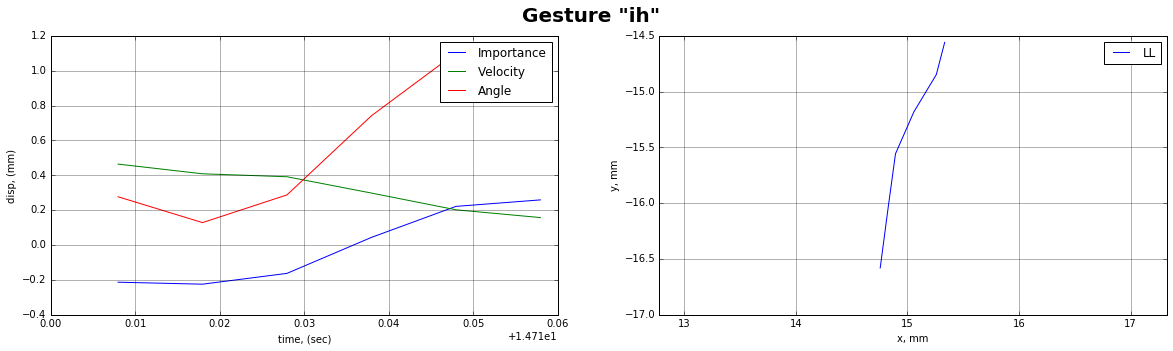

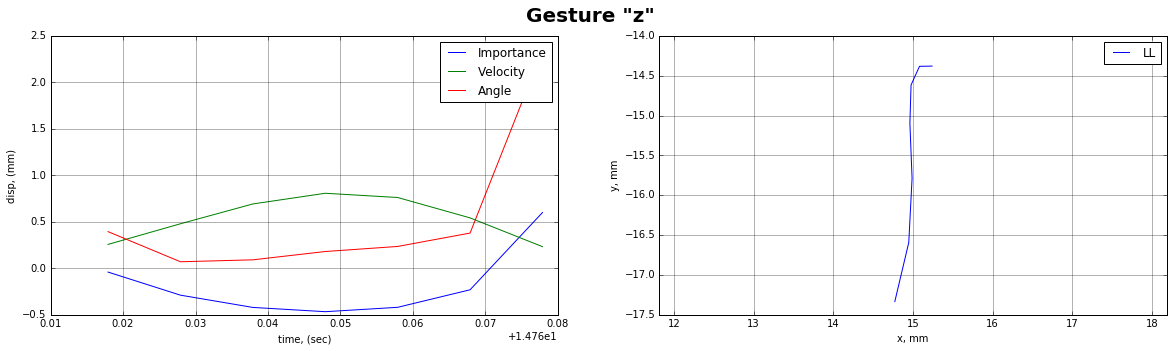

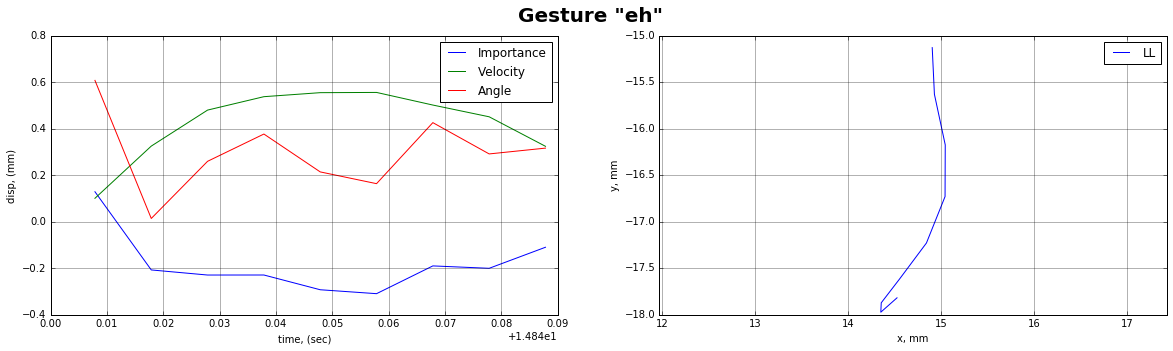

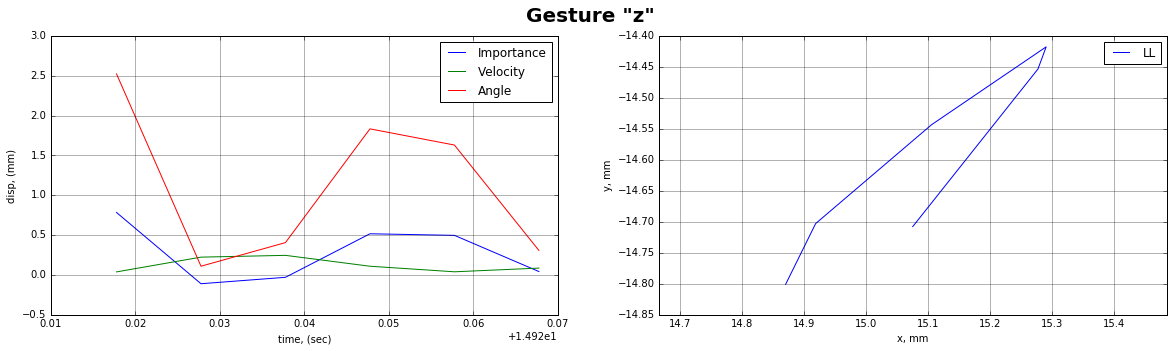

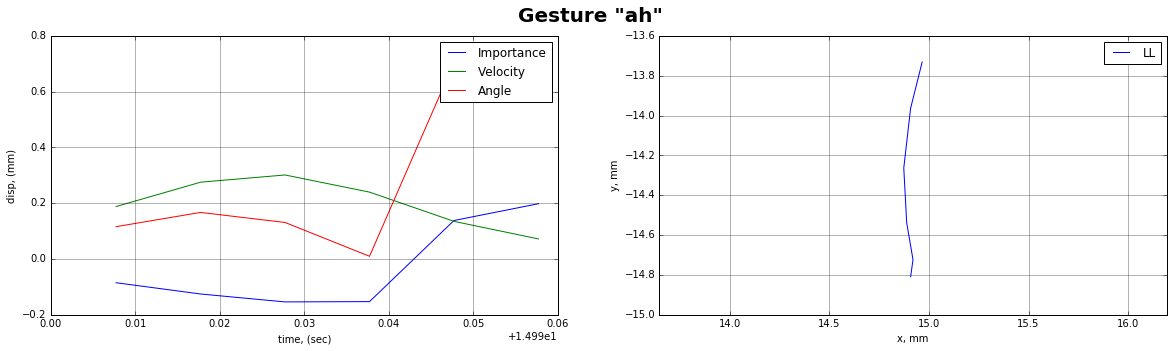

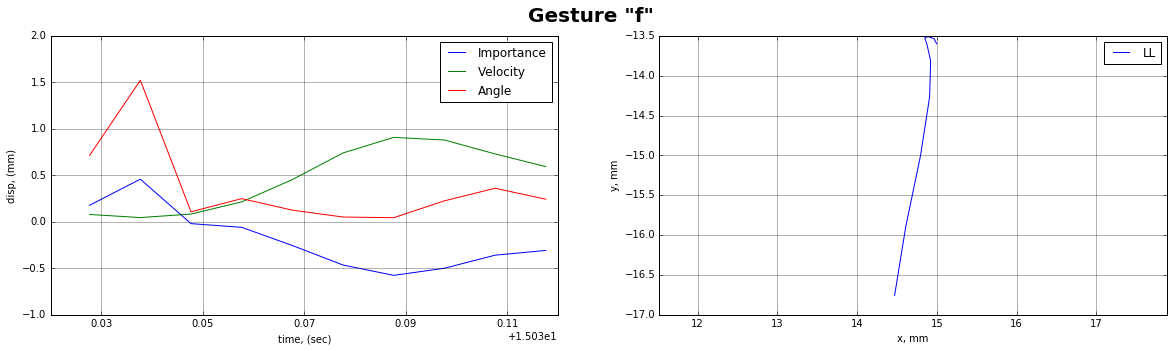

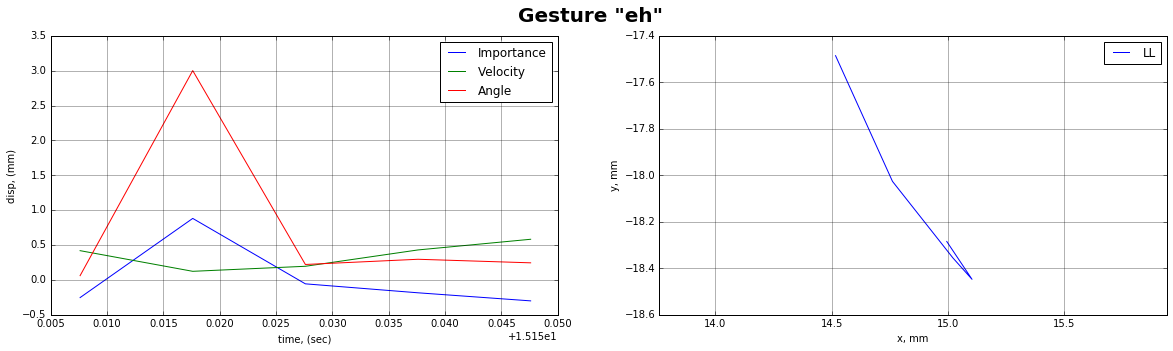

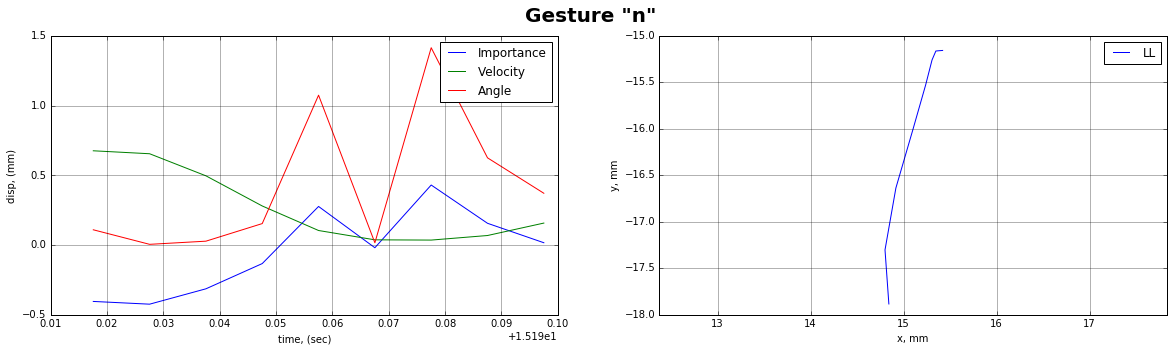

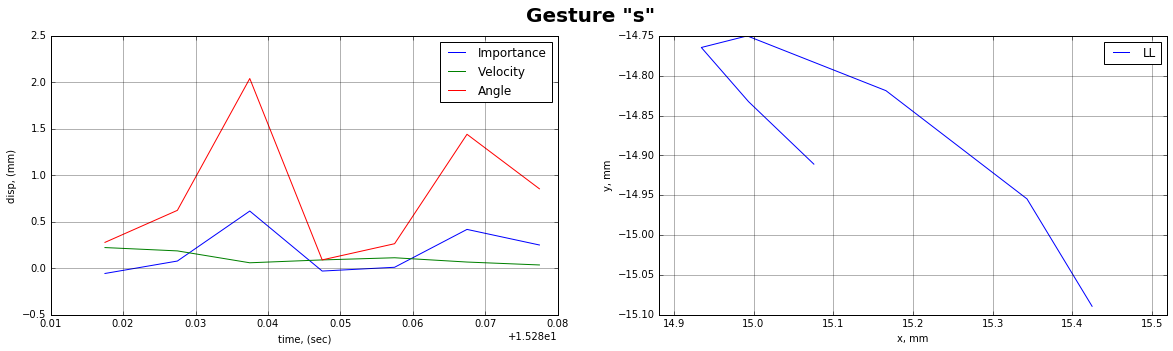

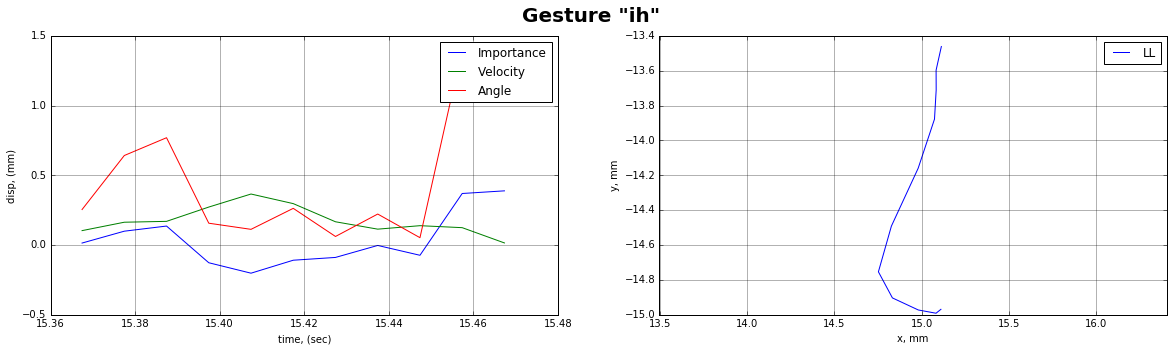

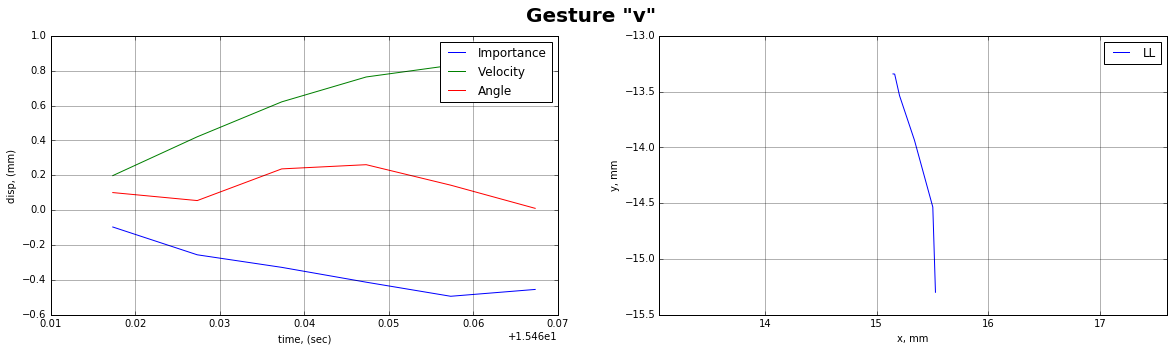

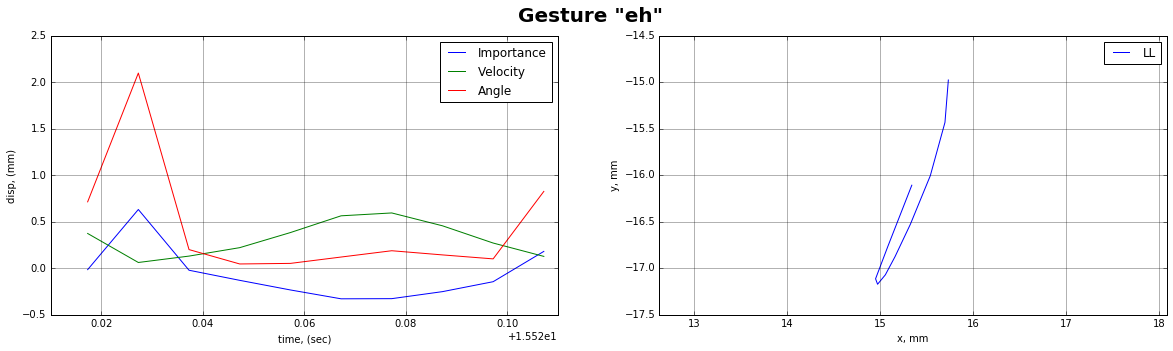

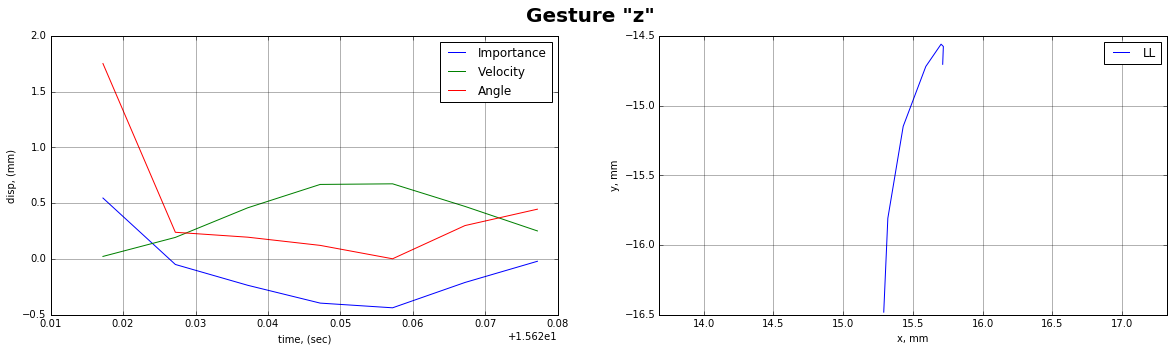

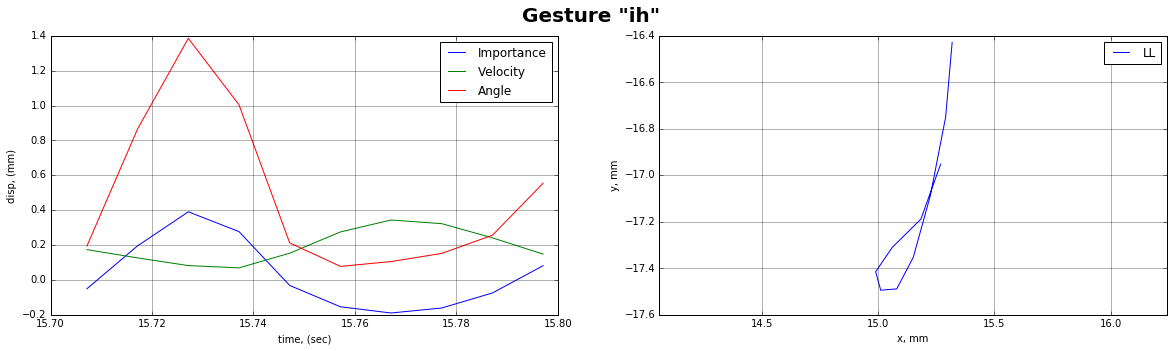

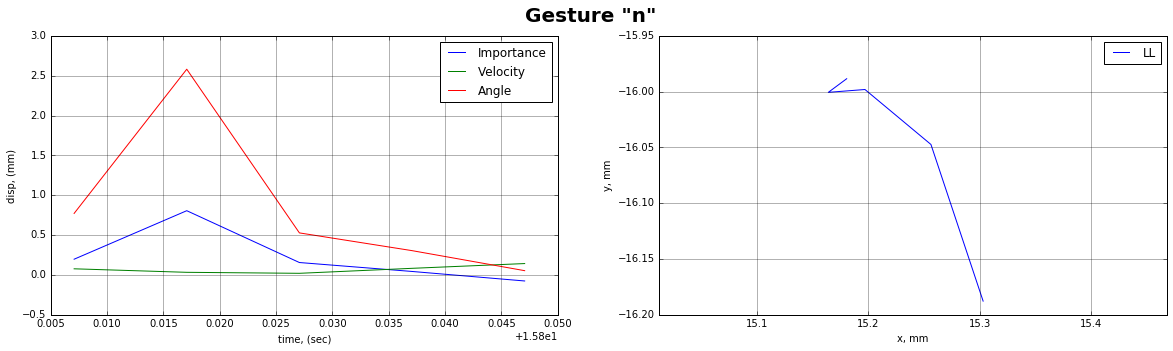

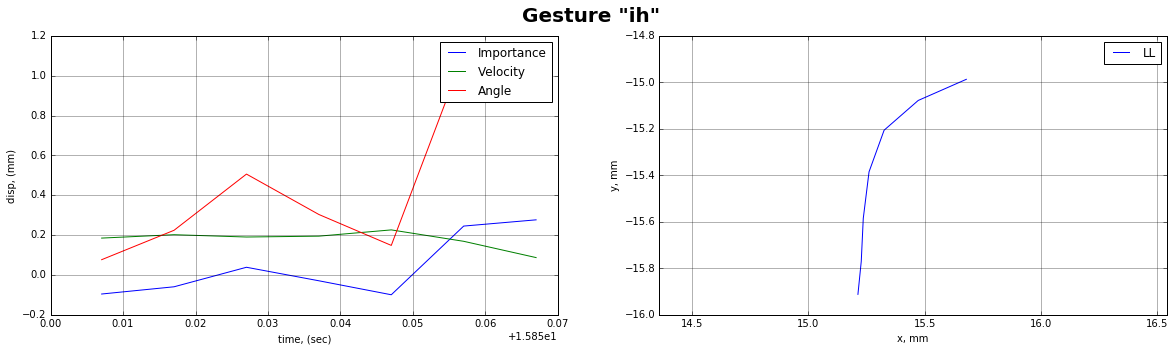

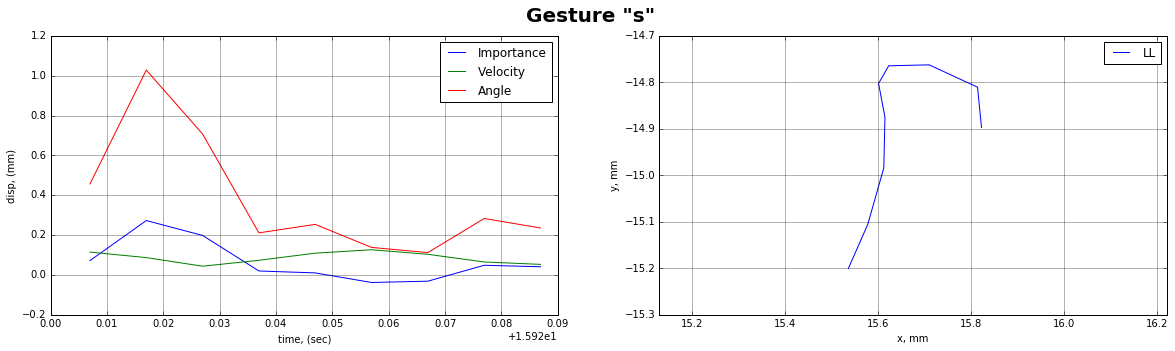

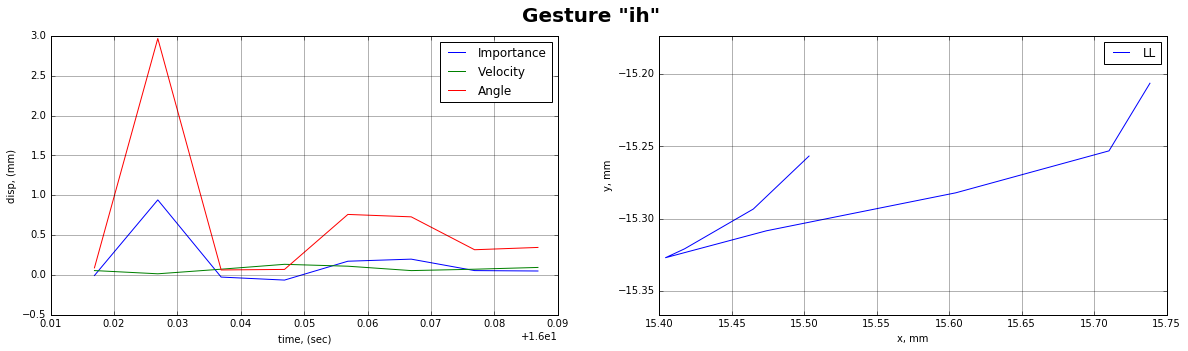

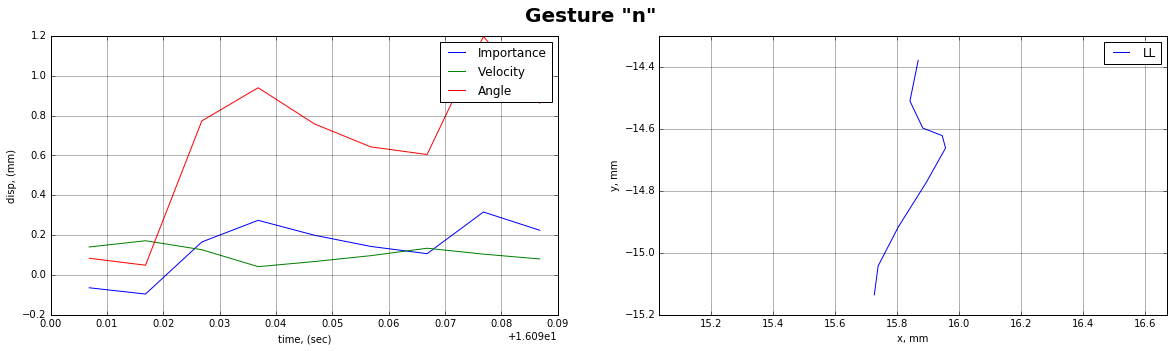

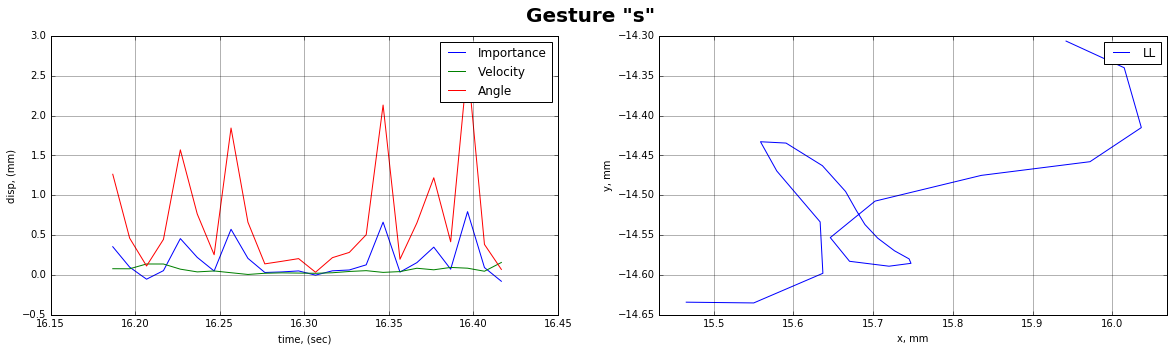

ValueError: x and y must have same first dimension

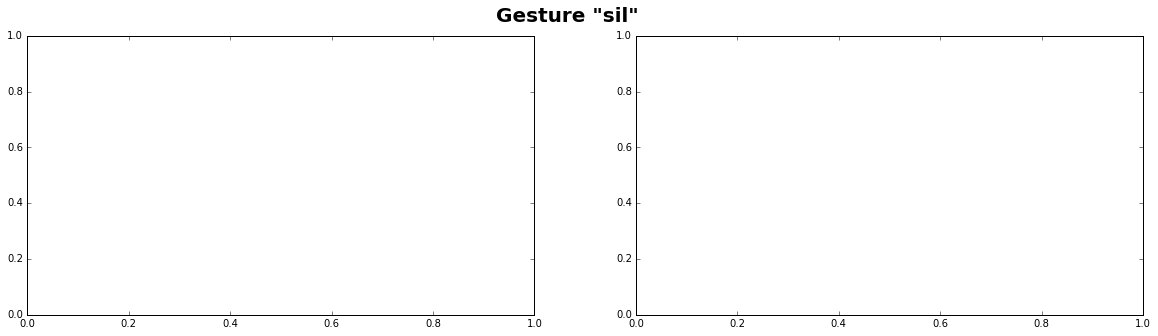

In [21]:
'''for s, e, p in zip(t_starts, t_ends, phonemes):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle("Gesture \"{}\"".format(p)
                 ,fontsize=20, fontweight='bold')
#   plot importance
    i_start = int(s*srates[artic+domains[0]])
    i_end = int(e*srates[artic+domains[0]])
    t = range(i_start,i_end)
    t = [i / srates[artic+domains[0]] for i in t]
    imp = importance[i_start:i_end]
    ax[0].plot(t, importance[i_start:i_end], label='Importance')
    ax[0].plot(t, vel[i_start:i_end], label='Velocity')
    ax[0].plot(t, angle[i_start:i_end], label='Angle')

#     ax[0].plot(t, params[artic+domains[0]][i_start:i_end], label=artic+domains[0])
#     ax[0].plot(t, params[artic+domains[1]][i_start:i_end], label=artic+domains[1])

    ax[0].legend()
    ax[0].grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
    ax[0].set_xlabel("time, (sec)")
    ax[0].set_ylabel("disp, (mm)")

# plot movement
    ax[1].plot( params[artic+domains[0]][i_start:i_end], params[artic+domains[1]][i_start:i_end], label=artic)
    ax[1].legend()
    ax[1].autoscale()
    ax[1].grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
    ax[1].set_xlabel('x, mm')
    ax[1].set_ylabel('y, mm')
    ax[1].axis('equal')
#     ax[1].axis([-7, -3, -3, 3])
    plt.show()
'''

## Find Critical Points

In [ ]:
crit_points = cp.find_critical_points(a, params)
crit_importance = [importance[i] for i in crit_points]
print crit_points

## Plot Critical Points

In [ ]:
import bisect

fig, ax = plt.subplots(figsize=(20, 6))

i_start = 300
i_end = 420

crit_p = [crit_points[i] for i in range(len(crit_points)) if i_start<crit_points[i]<i_end]
crit_imp = [importance[i] for i in crit_p]
crit_t = [i / srates[artic+domains[0]] for i in crit_p]
print crit_t
t = range(i_start,i_end)
t = [i / srates[artic+domains[0]] for i in t]
imp = importance[i_start:i_end]



ax.plot(t, importance[i_start:i_end], label='Importance')
ax.plot(t, vel[i_start:i_end], label='Velocity')
ax.plot(t, angle[i_start:i_end], label='Angle')
ax.plot(t, [angle[i]-angle[i-1] for i in range(i_start,i_end)], label='Angle velocity')
ax.scatter(crit_t, crit_imp)

ph_start = bisect.bisect(t_starts, t[0]) -1
ph_end = bisect.bisect(t_ends, t[-1])
for i in range(ph_start, ph_end):
    width = t_ends[i]-t_starts[i]
    height = ax.get_ylim()[1]-ax.get_ylim()[0]
    ax.add_patch(patches.Rectangle((t_starts[i], ax.get_ylim()[0]),
                                    width, height, color=colors[phonemes[i]] , alpha=0.2))  
    ax.text(t_starts[i]+width/2-0.005, ax.get_ylim()[0] + 0.1, phonemes[i], fontsize=15)

# ax.plot(t, params[artic+domains[0]][i_start:i_end], label=artic+domains[0])
# ax.plot(t, params[artic+domains[1]][i_start:i_end], label=artic+domains[1])

ax.legend()
ax.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
ax.set_xlabel("time, (sec)")
ax.set_ylabel("disp, (mm)")
ax.autoscale()


fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.plot( params[artic+domains[0]][i_start:i_end], params[artic+domains[1]][i_start:i_end], label=artic)
crit_p_x = [params[artic+domains[0]][i]  for i in crit_p]
crit_p_y = [params[artic+domains[1]][i]  for i in crit_p]

ax1.scatter(crit_p_x, crit_p_y)
ax1.legend()
ax1.autoscale()
ax1.grid(color='black', linestyle='-', linewidth=1, alpha=0.3)
ax1.set_xlabel('x, mm')
ax1.set_ylabel('y, mm')
ax1.axis('equal')

In [8]:
a = [1,2,3,4,5,6]
b = [3,4]
print a+b
print a[2:3]

[1, 2, 3, 4, 5, 6, 3, 4]
[3]
